# Index of Economic Freedom

### Description
2019 Index of Economic Freedom – Problem Statement
Background:
Created in 1995 by the Heritage Foundation, The Index of economic freedom, is a ranking created to
measure the economic freedom in the countries of the world. Now, in its 25 th edition, The Economic
Freedom Index is poised to help readers track over two decades of the advancement in economic
freedom, prosperity, and opportunity and promote these ideas in their homes, schools, and communities.
The Index covers 12 freedoms – from property rights to financial freedom – in 186 countries.
Source of the data:
This dataset belongs to The Heritage Foundation: https://www.heritage.org/index. This dataset is
freely available to download on their website.

 

### Data Set:
The data (last updated 26/02/2019) is presented in CSV format as follows:
CountryID, Country Name, WEBNAME, Region, World Rank, Region Rank, 2019 Score, Property
Rights, Judical Effectiveness, Government Integrity, Tax Burden, Gov&#39;t Spending, Fiscal Health,
Business Freedom, Labor Freedom, Monetary Freedom, Trade Freedom, Investment Freedom,
Financial Freedom, Tariff Rate (%), Income Tax Rate (%), Corporate Tax Rate (%), Tax Burden % of
GDP, Gov&#39;t Expenditure % of GDP , Country, Population (Millions), &quot;GDP (Billions, PPP)&quot;, GDP Growth
Rate (%), 5 Year GDP Growth Rate (%), GDP per Capita (PPP), Unemployment (%), Inflation (%), FDI
Inflow (Millions), Public Debt (% of GDP)
All these features are self-explanatory and the learners can research more on the same here.

Apply the concepts and techniques you have learned in the previous weeks to clusters countries based on variables that indicates freedom index and derive insights and make some business recommendations


In [394]:
# Libraries to help with reading and manipulating data
import numpy as np
import copy
from numpy import percentile
import pandas as pd
# Libraries to help with data visualization
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
# Libraries to tune model, get different metric scores, and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from scipy.stats import zscore
from scipy.cluster.hierarchy import linkage,cophenet,dendrogram
from scipy.spatial import ConvexHull
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
# Library to supress the warning
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [2]:
job = pd.read_csv('economic_freedom_index2019_data.csv')
# copying data to another varaible to avoid any changes to original data
data = job.copy()
data.head()

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,Afghanistan,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,Albania,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,Algeria,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,Angola,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.5",65.3
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,Argentina,44.1,$920.2,2.9,0.7,"$20,876",8.7,25.7,"11,857.0",52.6


Understand the shape of the dataset.

In [3]:
data.shape

(186, 34)

## Data pre-processing

### Remove duplicate columns

#### Checking the columns Country Name, WEBNAME and Country

In [4]:
data[data['Country Name']!=data['WEBNAME']][['Country Name','WEBNAME']]

,Country Name,WEBNAME
19,Bosnia and Herzegovina,BosniaHerzegovina
22,Brunei Darussalam,Brunei
24,Burkina Faso,BurkinaFaso
30,Cabo Verde,CaboVerde
31,Central African Republic,CentralAfricanRepublic
37,"Congo, Democratic Republic of the Congo",DemcoraticRepublicCongo
38,"Congo, Republic of",RepublicCongo
39,Costa Rica,CostaRica
40,C�te d'Ivoire,CoeDivoire
44,Czech Republic,CzechRepublic


### Insights:

 - the columns  'Country Name' and 'Webname' represent the same countries, with minor differences in the way they are written
 - It is safe to remove one column

In [5]:
data.drop('WEBNAME', axis =1, inplace = True)

In [6]:
data[data['Country Name']!=data['Country']][['Country Name','Country']]

,Country Name,Country
72,Hong Kong,Hong Kong SAR
93,Laos,Lao P.D.R.
150,Slovakia,Slovak Republic


### Insights:

 - the columns  'Country Name' and 'Webname' are the same countries, with mnor differeneces win the way they are represented.
 - It is safe to remove one column

In [7]:
data.drop('Country', axis =1, inplace = True)

### Remove currency symbols

 - The curency symbols to be removed from 'GDP (Billions, PPP)' and 'GDP per Capita (PPP)'  

In [8]:
data.head()

,CountryID,Country Name,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,91.7,...,25.6,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,2,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,86.3,...,29.5,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,3,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,76.4,...,41.4,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8
3,4,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,83.9,...,25.3,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.5",65.3
4,5,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,69.3,...,41.0,44.1,$920.2,2.9,0.7,"$20,876",8.7,25.7,"11,857.0",52.6


In [9]:
data['GDP (Billions, PPP)'] = data['GDP (Billions, PPP)'].astype(str).str.lstrip('$') 
data['GDP per Capita (PPP)'] = data['GDP per Capita (PPP)'].astype(str).str.lstrip('$') 
data.head()

,CountryID,Country Name,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,91.7,...,25.6,35.5,69.6,2.5,2.9,"1,958",8.8,5.0,53.9,7.3
1,2,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,86.3,...,29.5,2.9,36.0,3.9,2.5,"12,507",13.9,2.0,"1,119.1",71.2
2,3,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,76.4,...,41.4,41.5,632.9,2.0,3.1,"15,237",10.0,5.6,"1,203.0",25.8
3,4,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,83.9,...,25.3,28.2,190.3,0.7,2.9,"6,753",8.2,31.7,"-2,254.5",65.3
4,5,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,69.3,...,41.0,44.1,920.2,2.9,0.7,"20,876",8.7,25.7,"11,857.0",52.6


### removing unecessary text column

- the column <b> 'Population (Millions)' </b> has the value as <b> '38,000 ppl'  </b>, the extra 'ppl' needs to be removed

In [10]:
data.loc[data['Country Name'] == 'Liechtenstein']['Population (Millions)']

99    38,000 ppl.
Name: Population (Millions), dtype: object

In [11]:
data['Population (Millions)'] = data['Population (Millions)'].str.rstrip('ppl.').str.strip()

In [12]:
data.loc[data['Country Name'] == 'Liechtenstein']['Population (Millions)']

99    38,000
Name: Population (Millions), dtype: object

- the column <b> 'GDP (Billions, PPP))' </b> has the value as <b> '$40.0 (2015 est.)' </b>, the extra '(2015 est.)' needs to be removed

In [13]:
data.loc[data['Country Name'] == 'Korea, North ']['GDP (Billions, PPP)']

88    40.0 (2015 est.)
Name: GDP (Billions, PPP), dtype: object

In [14]:
data['GDP (Billions, PPP)'] = data['GDP (Billions, PPP)'].str.replace('\(2015 est.\)','')

In [15]:
data.loc[data['Country Name'] == 'Korea, North ']['GDP (Billions, PPP)']

88    40.0 
Name: GDP (Billions, PPP), dtype: object

- the column <b> 'GDP per Capita (PPP)' </b> has values as <b> $1,700 (2015 est.) , $139,100 (2009 est.) </b>, the extra characters needs to be removed

In [16]:
data.loc[data['Country Name'] == 'Korea, North ']['GDP per Capita (PPP)']

88    1,700 (2015 est.)
Name: GDP per Capita (PPP), dtype: object

In [17]:
data.loc[data['Country Name'] == 'Liechtenstein']['GDP per Capita (PPP)']

99    139,100 (2009 est.)
Name: GDP per Capita (PPP), dtype: object

In [18]:
data['GDP per Capita (PPP)'] = data['GDP per Capita (PPP)'].str.replace('\(2015 est.\)','')
data['GDP per Capita (PPP)'] = data['GDP per Capita (PPP)'].str.replace('\(2009 est.\)','')

In [19]:
print(data.loc[data['Country Name'] == 'Korea, North ']['GDP per Capita (PPP)'])
print(data.loc[data['Country Name'] == 'Liechtenstein']['GDP per Capita (PPP)'])

88    1,700 
Name: GDP per Capita (PPP), dtype: object
99    139,100 
Name: GDP per Capita (PPP), dtype: object


- the column <b> 'Unemployment (%)' </b> has value as <b> 2.1 (2016) </b>, the extra characters needs to be removed

In [20]:
data.loc[data['Country Name'] == 'Liechtenstein']['Unemployment (%)']

99    2.1 (2016)
Name: Unemployment (%), dtype: object

In [21]:
data['Unemployment (%)'] = data['Unemployment (%)'].str.replace('\(2016\)','').str.strip()
data.loc[data['Country Name'] == 'Liechtenstein']['Unemployment (%)']

99    2.1
Name: Unemployment (%), dtype: object

- the column <b> 'GDP (Billions, PPP)' </b> has value as <b> $6.1 CHF (2014 ) </b>, the extra characters needs to be removed

In [22]:
data.loc[data['Country Name'] == 'Liechtenstein']['GDP (Billions, PPP)']

99    6.1 CHF (2014 )
Name: GDP (Billions, PPP), dtype: object

In [23]:
data['GDP (Billions, PPP)'] = data['GDP (Billions, PPP)'].str.replace('CHF \(2014 \)','').str.strip()
data.loc[data['Country Name'] == 'Liechtenstein']['GDP (Billions, PPP)']

99    6.1
Name: GDP (Billions, PPP), dtype: object

### Changing datatype from numberical columns from object to float

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CountryID                    186 non-null    int64  
 1   Country Name                 186 non-null    object 
 2   Region                       186 non-null    object 
 3   World Rank                   180 non-null    float64
 4   Region Rank                  180 non-null    float64
 5   2019 Score                   180 non-null    float64
 6   Property Rights              185 non-null    float64
 7   Judical Effectiveness        185 non-null    float64
 8   Government Integrity         185 non-null    float64
 9   Tax Burden                   180 non-null    float64
 10  Gov't Spending               183 non-null    float64
 11  Fiscal Health                183 non-null    float64
 12  Business Freedom             185 non-null    float64
 13  Labor Freedom       

### Insights:

The columns  need to be converted into float:
 -  Population (Millions)
 -  GDP (Billions, PPP)
 -  GDP per Capita (PPP)
 -  Unemployment (%)
 -  FDI Inflow (Millions)

In [25]:
#STEP - remove all commas from the columns names and then convert it to float
data['Population (Millions)'] = data['Population (Millions)'].str.replace(',', '').astype(float)
data['GDP per Capita (PPP)'] = data['GDP per Capita (PPP)'].str.replace(',', '').astype(float)
data['Unemployment (%)'] = data['Unemployment (%)'].str.replace(',', '').astype(float)
data['FDI Inflow (Millions)'] = data['FDI Inflow (Millions)'].str.replace(',', '').astype(float)
data['GDP (Billions, PPP)'] = data['GDP (Billions, PPP)'].str.replace(',', '').astype(float)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CountryID                    186 non-null    int64  
 1   Country Name                 186 non-null    object 
 2   Region                       186 non-null    object 
 3   World Rank                   180 non-null    float64
 4   Region Rank                  180 non-null    float64
 5   2019 Score                   180 non-null    float64
 6   Property Rights              185 non-null    float64
 7   Judical Effectiveness        185 non-null    float64
 8   Government Integrity         185 non-null    float64
 9   Tax Burden                   180 non-null    float64
 10  Gov't Spending               183 non-null    float64
 11  Fiscal Health                183 non-null    float64
 12  Business Freedom             185 non-null    float64
 13  Labor Freedom       

### Missing-Value Treatment

In [27]:
x= data.isnull().sum()
x = x[x.values!=0]
print(x)

World Rank                     6
Region Rank                    6
2019 Score                     6
Property Rights                1
Judical Effectiveness          1
Government Integrity           1
Tax Burden                     6
Gov't Spending                 3
Fiscal Health                  3
Business Freedom               1
Labor Freedom                  2
Monetary Freedom               2
Trade Freedom                  4
Investment Freedom             2
Financial Freedom              5
Tariff Rate (%)                4
Income Tax Rate (%)            3
Corporate Tax Rate (%)         3
Tax Burden % of GDP            7
Gov't Expenditure % of GDP     4
GDP (Billions, PPP)            1
GDP Growth Rate (%)            2
5 Year GDP Growth Rate (%)     3
GDP per Capita (PPP)           2
Unemployment (%)               5
Inflation (%)                  4
FDI Inflow (Millions)          5
Public Debt (% of GDP)         4
dtype: int64


### Insights:

 - the columns  listed above have non null values
 - Since there are not lots of rows to begin with,  we will NOT delete the roes with null values.
 - Instead we will use **KNN Imputer** to impute the NULL values
 

In [28]:
imputer = KNNImputer(n_neighbors=5)

In [29]:
reqd_col_for_impute = list(x.index)
print(reqd_col_for_impute)

['World Rank', 'Region Rank', '2019 Score', 'Property Rights', 'Judical Effectiveness', 'Government Integrity', 'Tax Burden', "Gov't Spending", 'Fiscal Health', 'Business Freedom', 'Labor Freedom', 'Monetary Freedom', 'Trade Freedom', 'Investment Freedom ', 'Financial Freedom', 'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)', 'Tax Burden % of GDP', "Gov't Expenditure % of GDP ", 'GDP (Billions, PPP)', 'GDP Growth Rate (%)', '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)', 'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)', 'Public Debt (% of GDP)']


In [30]:
data[reqd_col_for_impute].head()

,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,...,Tax Burden % of GDP,Gov't Expenditure % of GDP,"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,152.0,39.0,51.5,19.6,29.6,25.2,91.7,80.3,99.3,49.2,...,5.0,25.6,69.6,2.5,2.9,1958.0,8.8,5.0,53.9,7.3
1,52.0,27.0,66.5,54.8,30.6,40.4,86.3,73.9,80.6,69.3,...,24.9,29.5,36.0,3.9,2.5,12507.0,13.9,2.0,1119.1,71.2
2,171.0,14.0,46.2,31.6,36.2,28.9,76.4,48.7,18.7,61.6,...,24.5,41.4,632.9,2.0,3.1,15237.0,10.0,5.6,1203.0,25.8
3,156.0,33.0,50.6,35.9,26.6,20.5,83.9,80.7,58.2,55.7,...,20.6,25.3,190.3,0.7,2.9,6753.0,8.2,31.7,-2254.5,65.3
4,148.0,26.0,52.2,47.8,44.5,33.5,69.3,49.5,33.0,56.4,...,30.8,41.0,920.2,2.9,0.7,20876.0,8.7,25.7,11857.0,52.6


In [31]:
df= data.copy()

In [32]:
df[reqd_col_for_impute]=imputer.fit_transform(df[reqd_col_for_impute])

In [33]:
# Check NULL values in new dataframe
df.isnull().sum()

CountryID                      0
Country Name                   0
Region                         0
World Rank                     0
Region Rank                    0
2019 Score                     0
Property Rights                0
Judical Effectiveness          0
Government Integrity           0
Tax Burden                     0
Gov't Spending                 0
Fiscal Health                  0
Business Freedom               0
Labor Freedom                  0
Monetary Freedom               0
Trade Freedom                  0
Investment Freedom             0
Financial Freedom              0
Tariff Rate (%)                0
Income Tax Rate (%)            0
Corporate Tax Rate (%)         0
Tax Burden % of GDP            0
Gov't Expenditure % of GDP     0
Population (Millions)          0
GDP (Billions, PPP)            0
GDP Growth Rate (%)            0
5 Year GDP Growth Rate (%)     0
GDP per Capita (PPP)           0
Unemployment (%)               0
Inflation (%)                  0
FDI Inflow

In [34]:
data=df.copy()

### Insights:

 - All NULL data has been replaced 

## Exploratory Data Analysis

## UNIVARIATE ANALYSIS

In [35]:
data.drop('CountryID', axis =  1, inplace=True)

In [36]:
data.count()

Country Name                   186
Region                         186
World Rank                     186
Region Rank                    186
2019 Score                     186
Property Rights                186
Judical Effectiveness          186
Government Integrity           186
Tax Burden                     186
Gov't Spending                 186
Fiscal Health                  186
Business Freedom               186
Labor Freedom                  186
Monetary Freedom               186
Trade Freedom                  186
Investment Freedom             186
Financial Freedom              186
Tariff Rate (%)                186
Income Tax Rate (%)            186
Corporate Tax Rate (%)         186
Tax Burden % of GDP            186
Gov't Expenditure % of GDP     186
Population (Millions)          186
GDP (Billions, PPP)            186
GDP Growth Rate (%)            186
5 Year GDP Growth Rate (%)     186
GDP per Capita (PPP)           186
Unemployment (%)               186
Inflation (%)       

In [37]:
data['Country Name'].nunique()

186

In [38]:
data.drop('Country Name',axis=1).describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
World Rank,186.0,91.07,51.95,1.0,46.25,91.50,135.75,180.0
Region Rank,186.0,20.67,12.65,1.0,10.00,20.00,31.00,47.0
2019 Score,186.0,60.67,11.19,5.9,53.85,60.60,67.78,90.2
Property Rights,186.0,52.35,19.56,7.6,37.00,50.35,65.70,97.4
Judical Effectiveness,186.0,44.92,18.06,5.0,31.00,42.90,54.68,92.4
Government Integrity,186.0,41.49,19.74,7.9,27.20,35.95,50.30,96.7
Tax Burden,186.0,77.30,13.04,0.0,71.22,78.35,85.38,99.8
Gov't Spending,186.0,64.26,22.97,0.0,52.18,68.84,81.75,96.6
Fiscal Health,186.0,66.22,31.58,0.0,40.78,80.15,91.52,100.0
Business Freedom,186.0,63.48,15.77,5.0,54.18,63.90,74.97,96.4


In [39]:
num_cols = data.drop('Country Name',axis=1).describe().transpose().index
num_cols

Index(['World Rank', 'Region Rank', '2019 Score', 'Property Rights',
       'Judical Effectiveness', 'Government Integrity', 'Tax Burden',
       'Gov't Spending', 'Fiscal Health', 'Business Freedom', 'Labor Freedom',
       'Monetary Freedom', 'Trade Freedom', 'Investment Freedom ',
       'Financial Freedom', 'Tariff Rate (%)', 'Income Tax Rate (%)',
       'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
       'Gov't Expenditure % of GDP ', 'Population (Millions)',
       'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)'],
      dtype='object')

In [40]:
len(num_cols)

29

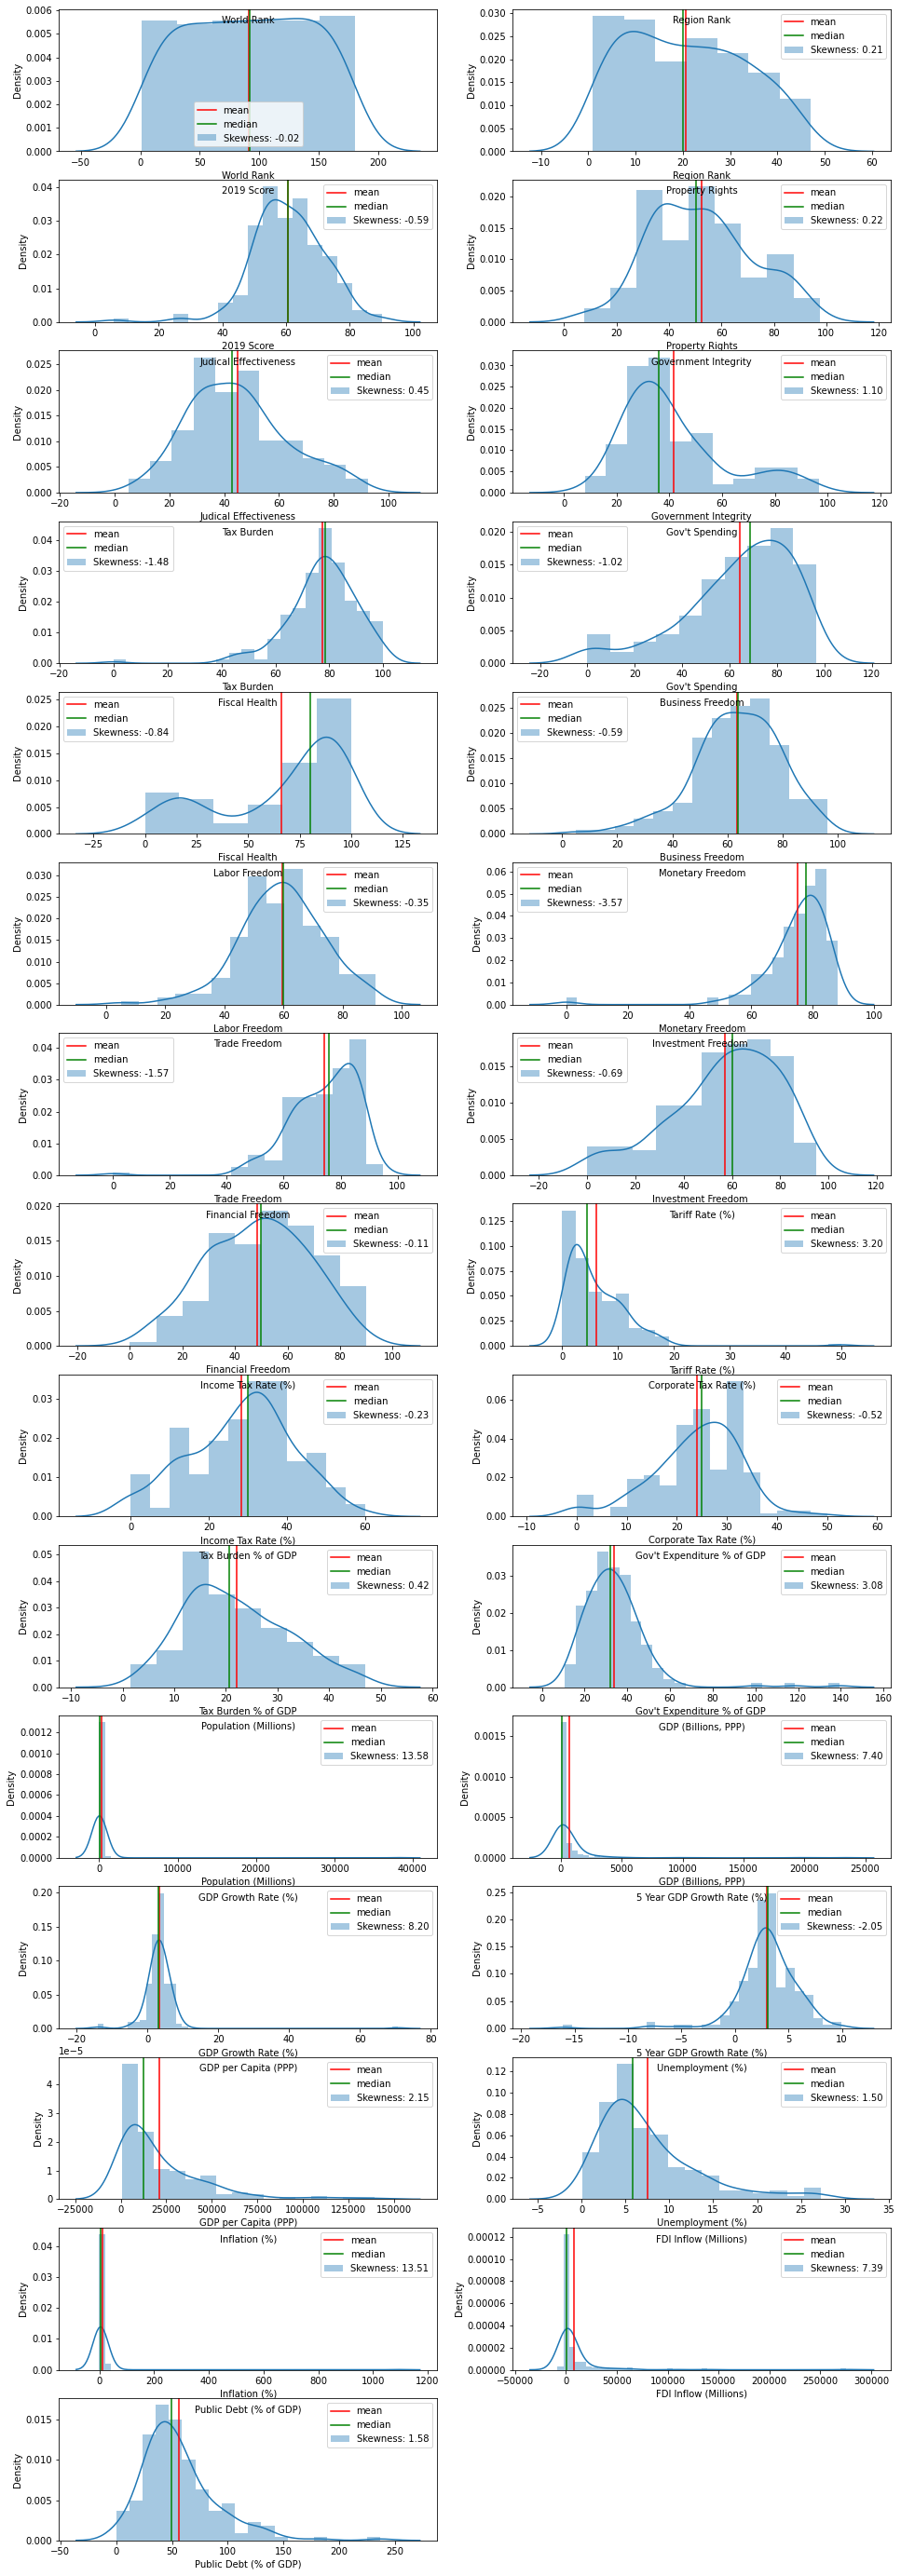

<Figure size 432x288 with 0 Axes>

In [47]:
plt.figure(figsize=(16, 50))
pos = 1
for col_names in num_cols:
    plt.subplot(15, 2, pos)
    #ax = f.add_subplot(gs[i, j])    
    col_data = data[col_names] 
    label="Skewness: %.2f"%(col_data.skew())     
    ax = sns.distplot (col_data, kde= True, label= label)
    plt.text(.5,.9,col_names,horizontalalignment='center',transform=ax.transAxes)
    plt.axvline(col_data.mean(),color='r',label= 'mean')
    plt.axvline(col_data.median(),color='g',label= 'median')
    plt.legend()
    pos += 1
        
plt.show()
plt.tight_layout()

In [99]:
columns = ['column', 'Skewness','Outlier']
featuresDF =pd.DataFrame(columns = columns)
featuresDF

,column,Skewness,Outlier


### Analyse Outliers and skewness

- The function below will display skeness and outliers in the data.
- We will use "percentile" function from numpy to calculate 
- Any value 1.5 times the inter quartile range will be considered as an outlier.

In [100]:
for col in num_cols:
    col_data = data[col]
    skewnes = col_data.skew()
    q25, q75 = percentile(col_data, 25), percentile(col_data, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = [x for x in col_data if x < lower or x > upper]
    outlier_count = len(outliers)
    tempdf = pd.DataFrame ([[col,skewnes, outlier_count]], columns = columns )
    featuresDF =  featuresDF.append(tempdf)
    
featuresDF    

,column,Skewness,Outlier
0,World Rank,-0.021917,0
0,Region Rank,0.212103,0
0,2019 Score,-0.594547,5
0,Property Rights,0.223784,0
0,Judical Effectiveness,0.454884,1
0,Government Integrity,1.097356,9
0,Tax Burden,-1.480147,7
0,Gov't Spending,-1.017024,8
0,Fiscal Health,-0.842474,0
0,Business Freedom,-0.594255,3


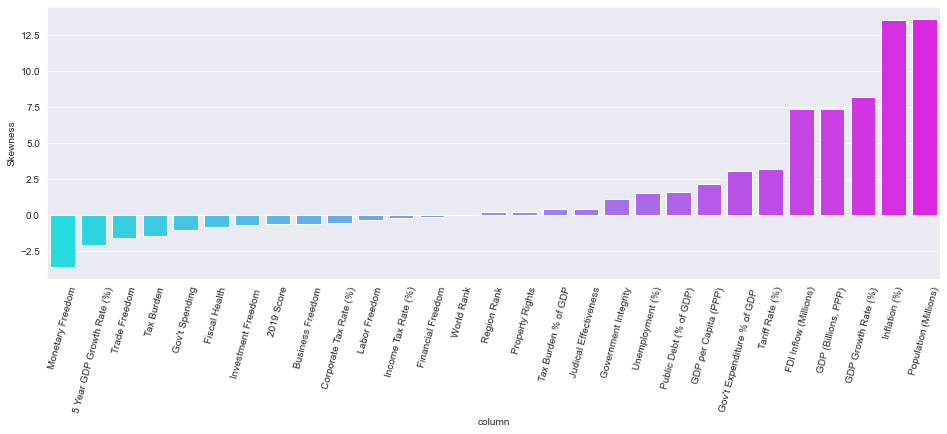

In [102]:
plt.figure(figsize=(16, 5))
sns.barplot(data= featuresDF.sort_values('Skewness'), x = 'column', y='Skewness',palette = 'cool' )
plt.xticks(rotation=75)
plt.show()

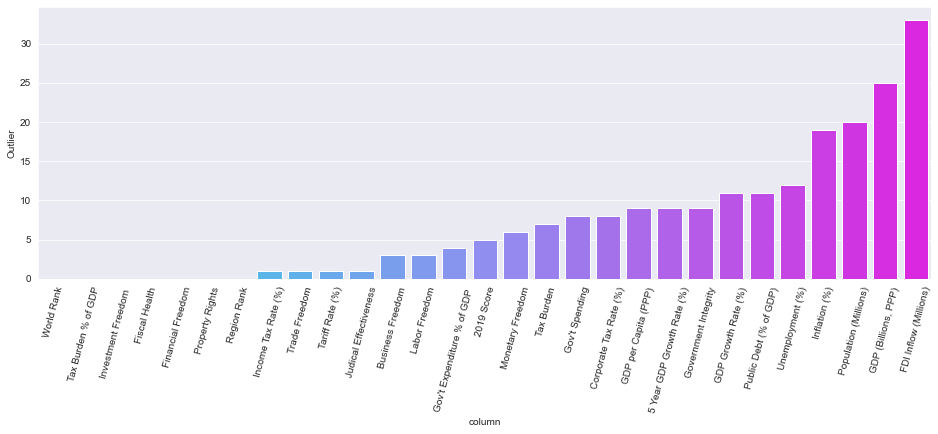

In [103]:
plt.figure(figsize=(16, 5))
sns.barplot(data= featuresDF.sort_values('Outlier' ), x = 'column', y='Outlier',palette = 'cool' )
plt.xticks(rotation=75)
plt.show()

In [104]:
featuresDF['Outlier'] = featuresDF['Outlier'].astype(float)

<AxesSubplot:>

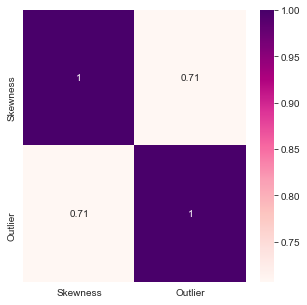

In [105]:
plt.figure(figsize=(5,5))
sns.heatmap(featuresDF.corr(),annot=True,cmap="RdPu")

<b>Insights</b>: 

 - Correlation is very high between skeness and outliers of the data
 - The following columns have very high outlier value and skewness:
     <ol>
     <b>
         <li>  FDI Inflow (Millions) </li>
         <li>  Population (Millions) </li>
         <li>  GDP (Billions, PPP) </li>
         <li>  Inflation (%)	 </li>
         <li>  GDP Growth Rate (%) </li>
         <li>  5 Year GDP Growth Rate (%) </li>
         <li>  Monetary Freedom </li>
         <li>  GDP per Capita (PPP) </li>
         <li>  Public Debt (% of GDP) </li>
         <li>  Tax Burden </li>
     </b>
     </ol>

- We will not remove the outliers; the primary couse of skewnwss in these coulmsn is due to presnet of outliers.
- However this is country's data, and the data can vary significantly; the data seems to be legitimate, hence the outliers wont be removed.

 - Extracting all columns which has lots of outliers but less skewness, hence emphasizing on data which does nto follow the trend.

In [106]:
outlierDf = featuresDF[(featuresDF['Outlier'] > 5) & (featuresDF['Skewness'] > -1.4) & (featuresDF['Skewness'] < 7)].sort_values('Skewness')
outlierDf.sort_values('Outlier', inplace=True, ascending=  False)
outlierDf

,column,Skewness,Outlier
0,Unemployment (%),1.503190,12.0
0,Public Debt (% of GDP),1.581967,11.0
0,Government Integrity,1.097356,9.0
0,GDP per Capita (PPP),2.146393,9.0
0,Gov't Spending,-1.017024,8.0
0,Corporate Tax Rate (%),-0.515919,8.0


In [131]:
def display_skewness_outliers(col_names):
    f = plt.figure(figsize=(16, 4))
    gs = f.add_gridspec(1, 2)
    ax = f.add_subplot(gs[0, 0])
    ax.text(.2,.9,col_names,horizontalalignment='center',transform=ax.transAxes,fontsize = 'large')    
    outlier_count = outlierDf[outlierDf['column'] == col_names ] ['Outlier']
    outlier_label = f"Outliers: %.f"%(outlier_count)
    sns.boxplot(data = df[col_names], palette = 'cool')
    ax = f.add_subplot(gs[0, 1])
    skewed_data = df[col_names]
    label=outlier_label+"\nSkewness: %.2f"%(skewed_data.skew())    
    ax.text(.5,.9,col_names,horizontalalignment='center',transform=ax.transAxes,fontsize = 'large')
    sns.histplot (data = data, x =col_names ,kde= True, palette = 'cool',label = label )
    plt.axvline(col_data.mean(),color='r',label= 'mean')
    plt.axvline(col_data.median(),color='g',label= 'median')        
    plt.legend(fontsize = 'x-large')
    plt.show()
    f.tight_layout()

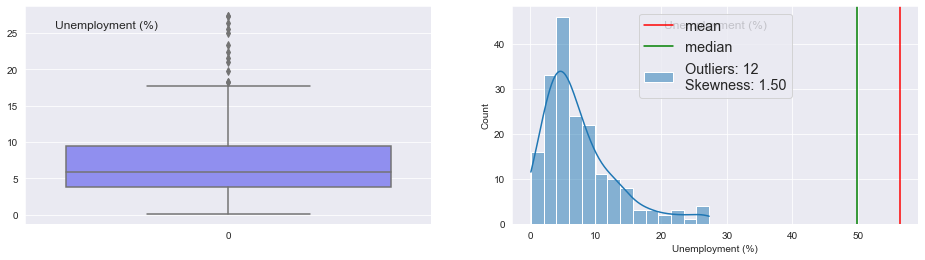

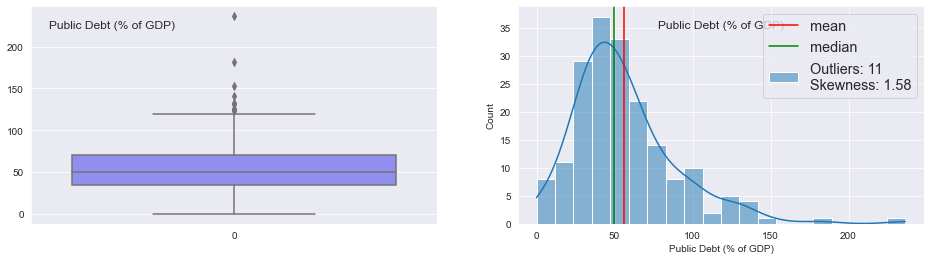

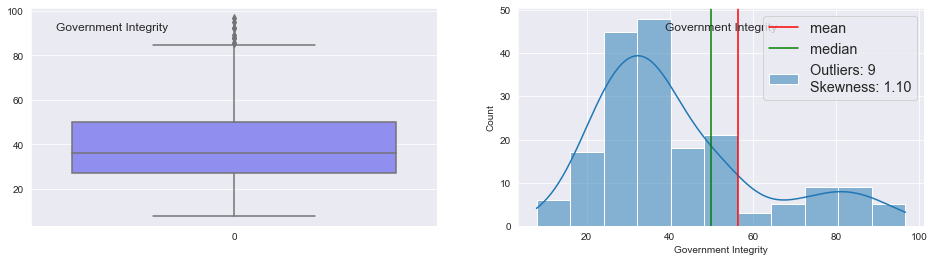

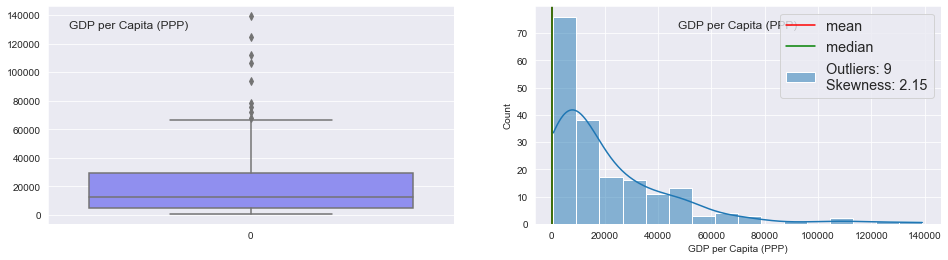

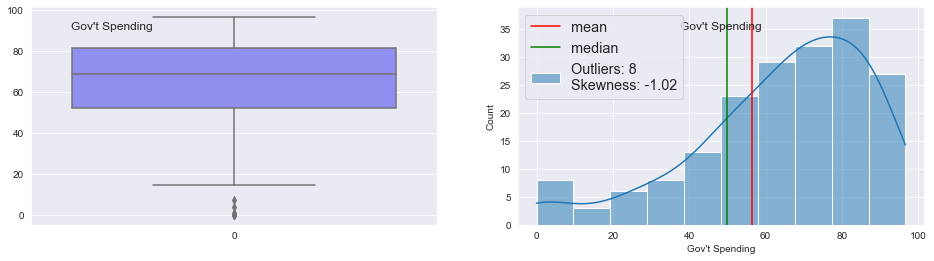

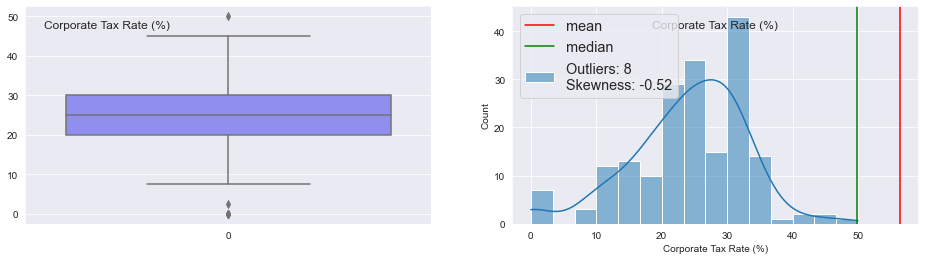

In [132]:
for name in outlierDf['column']:
    display_skewness_outliers(name)

<b>Insights</b>: 

 - the 2 columsn posses heavy outliers -
   - Unemployment (%)	
   - Public Debt (% of GDP)
   
 - this is due to the fact that there are countries with extereme unemployement, which lies an abnormal distance from other values

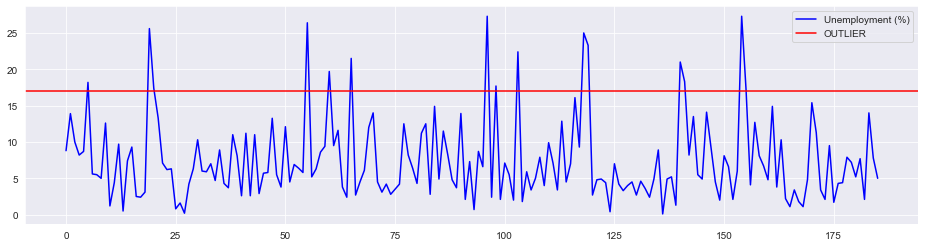

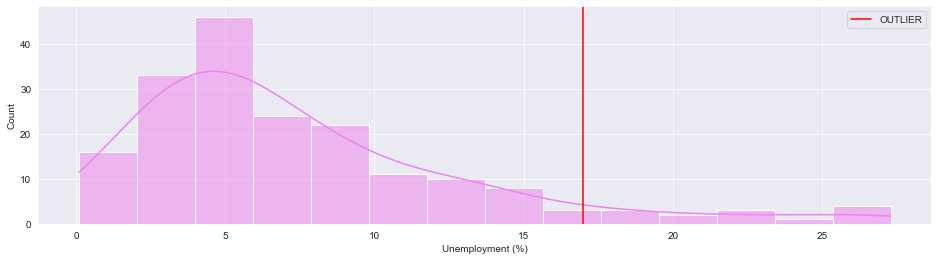

In [161]:
plt.figure(figsize=(16, 4))
data['Unemployment (%)'].plot(color='blue')
plt.axhline(y=17, color='r', linestyle='-',label= 'OUTLIER')
plt.legend()
plt.show()
plt.figure(figsize=(16, 4))
sns.histplot( data=  data, x = 'Unemployment (%)',kde=True, color='violet')
plt.axvline(x=17, color='r', linestyle='-',label= 'OUTLIER')
plt.legend()
plt.show()

<b>Insights</b>: 

 - in the first grapgh, the countries falling above the red line are outliers, as we can see there are plenty of countries that have an exorbitant amount of outliers.
 - in the second grapgh, the countries falling on the right side the red line are outliers, which shows plenty of countries that have very high Unemplyement rate

### BIVARIATE ANALSYSIS

In [169]:
corr = data.drop(['Country Name','Region'],axis=1).corr()

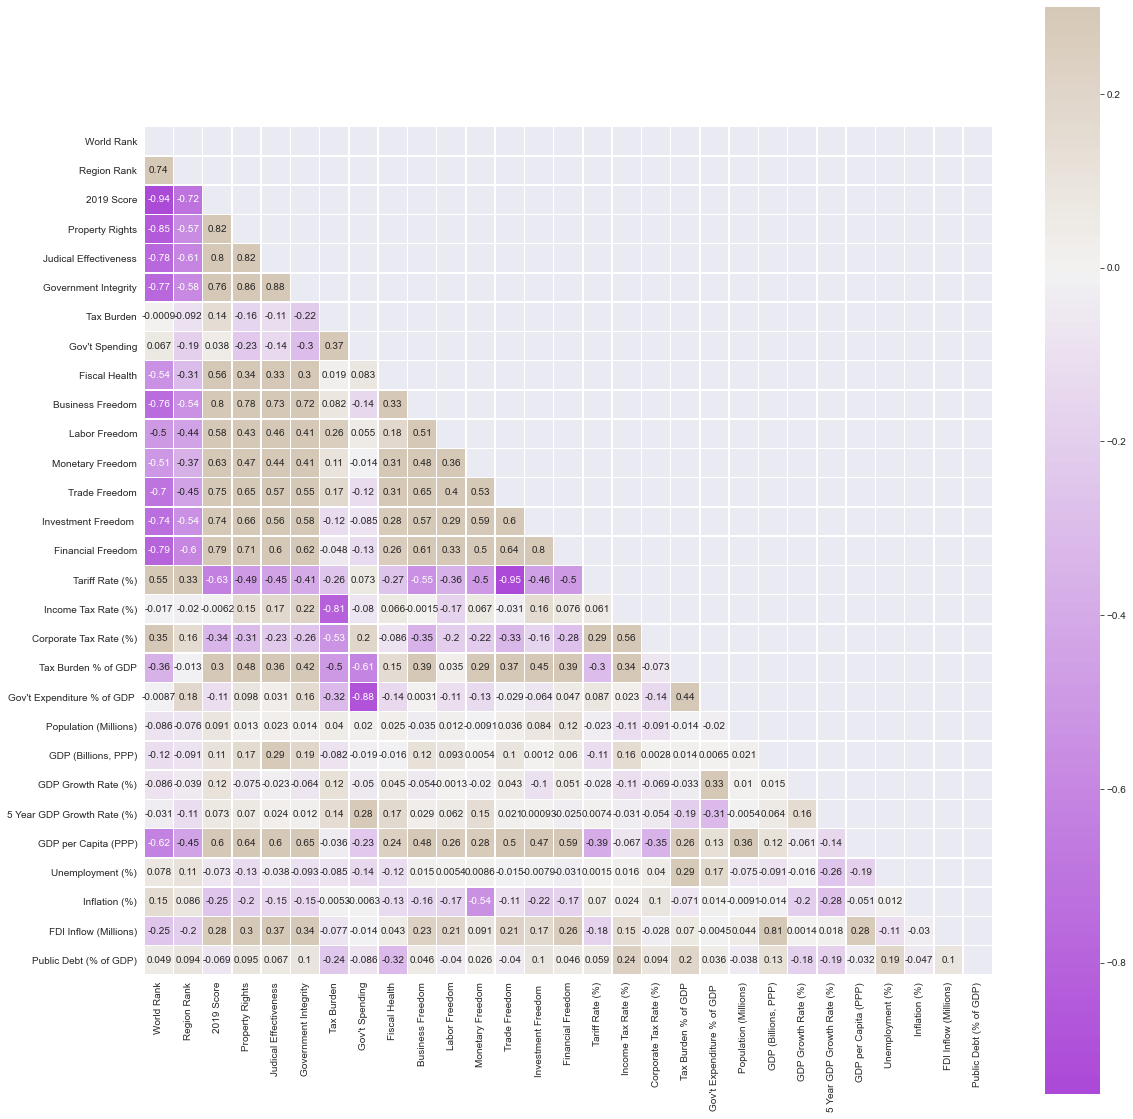

In [186]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(19,40))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(290, 50, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True, cmap=cmap )
plt.show()

<b>Insights</b>: 

 - columns 'World rank' and '2019 Score' have a very high correlatin and we can remove one of te column as they contain replaed information
 - columns 'World rank' and 'Property Rights' are very close, and have similar information  to some extenet, but its not duplicate.
 - columns 'Govt Spending' and 'Govt expenditure of GDP' too have good correlation of 0.88, however the information is has dissimilarities too, hence we will keep both.
 - Tarif rate and Trade freedom are inversely proportional to one another.

In [189]:
data.drop('2019 Score', axis = 1, inplace=True)

## PREPARING DATA FOR CLUSTERING MODELS

In [190]:
# Data scaling
datascaled=data.drop(['Country Name','Region'],axis=1).apply(zscore)
datascaled.head()

,World Rank,Region Rank,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1.176141,1.452871,-1.678878,-0.850661,-0.827343,1.106812,0.700281,1.050386,-0.907903,0.067454,...,-0.540482,-0.075098,-0.257013,-0.168164,-0.029781,-0.812937,0.229059,-0.069534,-0.302269,-1.451783
1,-0.754136,0.501789,0.125850,-0.795134,-0.055303,0.691646,0.420895,0.456615,0.370470,-0.473160,...,-0.285387,-0.086826,-0.271032,0.073689,-0.167919,-0.368988,1.132910,-0.107304,-0.260642,0.438453
2,1.542893,-0.528549,-1.063630,-0.484183,-0.639412,-0.069492,-0.679186,-1.508865,-0.119255,-0.669748,...,0.492979,-0.072939,-0.021974,-0.254540,0.039288,-0.254098,0.441730,-0.061980,-0.257363,-0.904532
3,1.253352,0.977330,-0.843166,-1.017242,-1.066066,0.507128,0.717743,-0.254641,-0.494499,-0.044881,...,-0.560104,-0.077724,-0.206650,-0.479118,-0.029781,-0.611142,0.122724,0.266620,-0.392480,0.263924
4,1.098930,0.422533,-0.233045,-0.023309,-0.405769,-0.615358,-0.644263,-1.054804,-0.449978,-0.880377,...,0.466816,-0.072004,0.097903,-0.099063,-0.789540,-0.016784,0.211337,0.191080,0.158989,-0.111756


In [191]:
# Statistical summary
datascaled.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
World Rank,186.0,-0.0,1.0,-1.74,-0.87,0.01,0.86,1.72
Region Rank,186.0,0.0,1.0,-1.56,-0.85,-0.05,0.82,2.09
Property Rights,186.0,0.0,1.0,-2.29,-0.79,-0.10,0.68,2.31
Judical Effectiveness,186.0,-0.0,1.0,-2.22,-0.77,-0.11,0.54,2.64
Government Integrity,186.0,-0.0,1.0,-1.71,-0.73,-0.28,0.45,2.80
Tax Burden,186.0,-0.0,1.0,-5.94,-0.47,0.08,0.62,1.73
Gov't Spending,186.0,0.0,1.0,-2.81,-0.53,0.20,0.76,1.41
Fiscal Health,186.0,0.0,1.0,-2.10,-0.81,0.44,0.80,1.07
Business Freedom,186.0,-0.0,1.0,-3.72,-0.59,0.03,0.73,2.09
Labor Freedom,186.0,-0.0,1.0,-3.82,-0.61,0.03,0.63,2.22


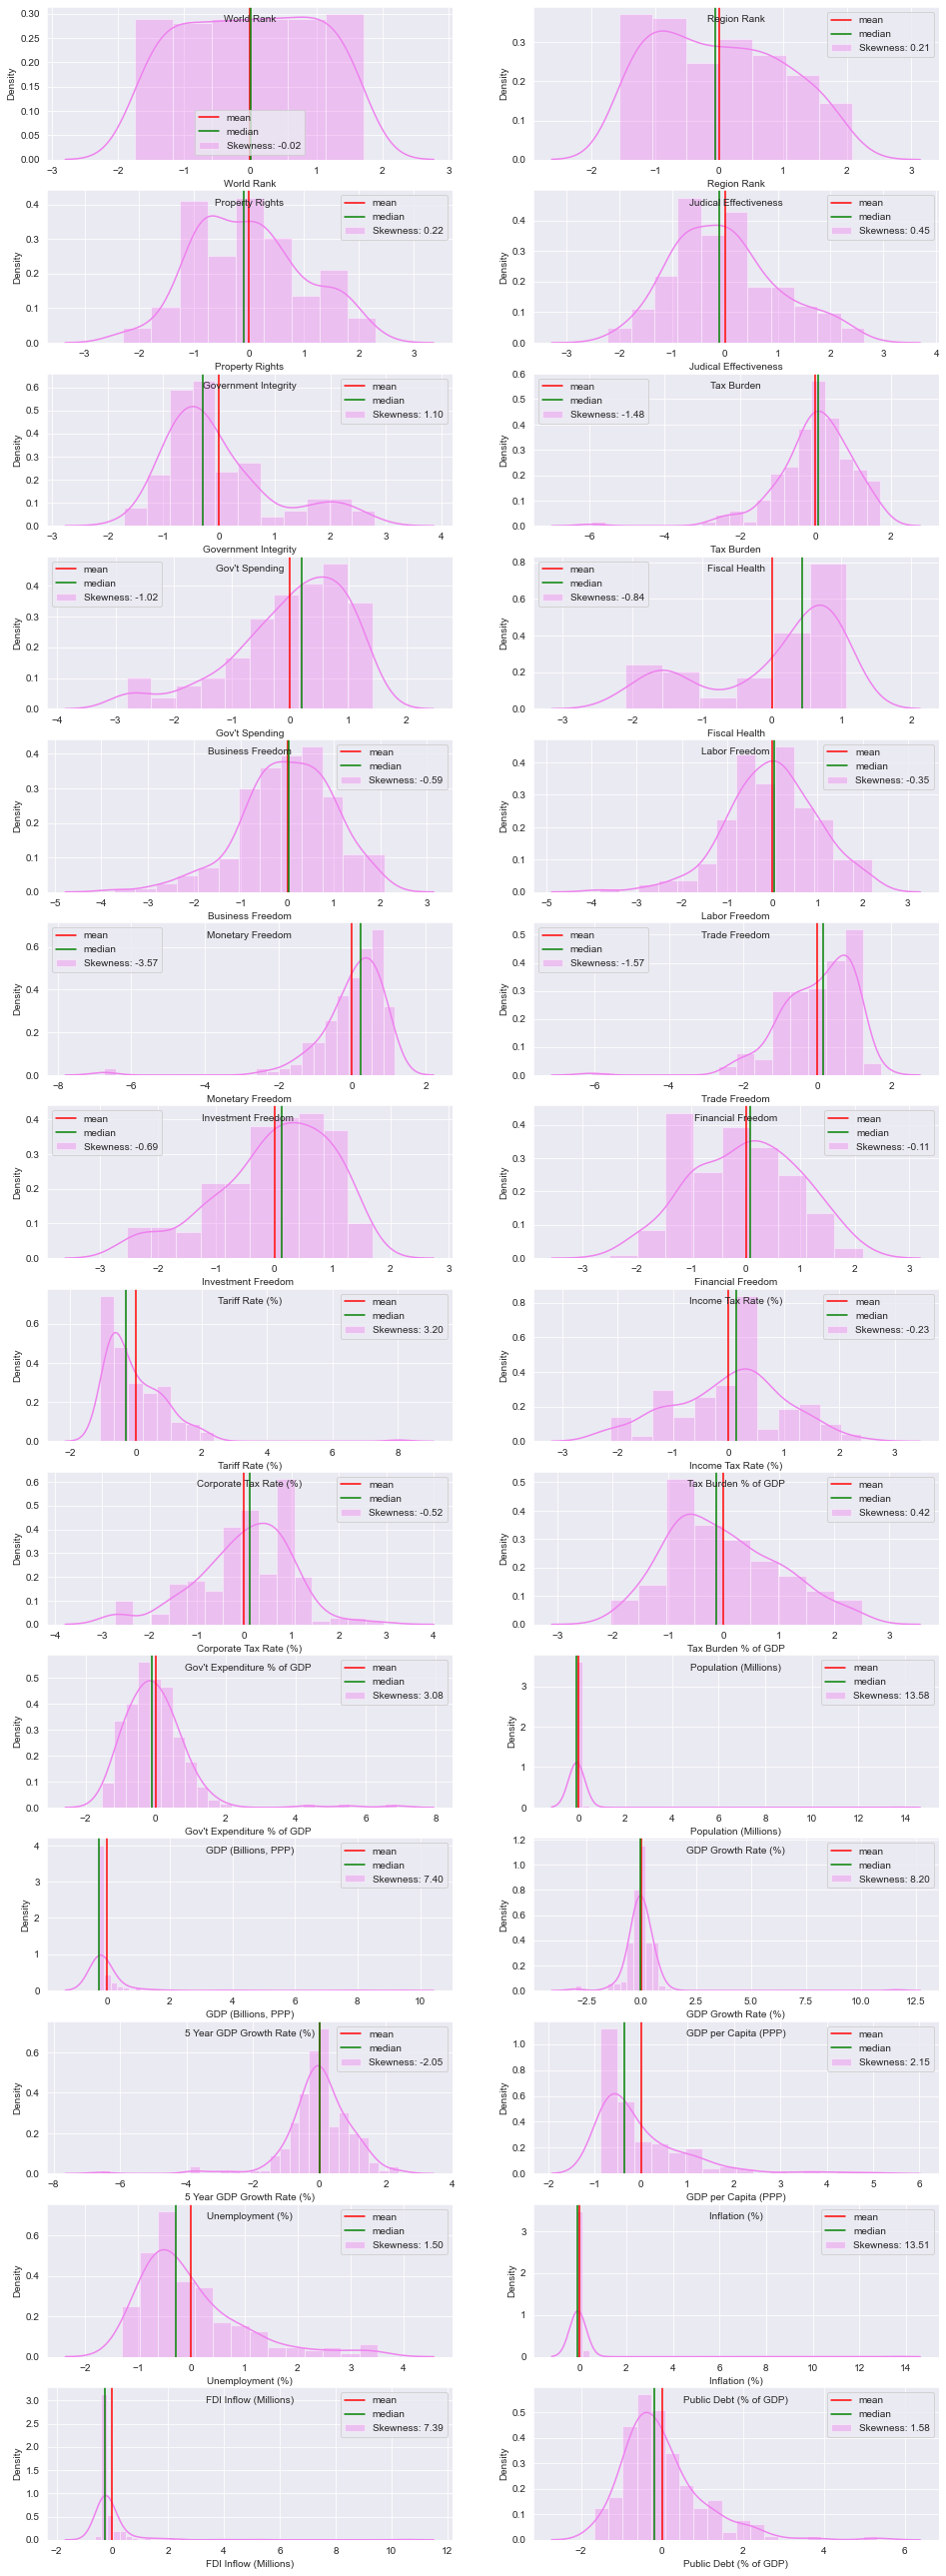

<Figure size 432x288 with 0 Axes>

In [195]:
# Visualizing data after scaling
plt.figure(figsize=(16, 50))
pos = 1
for col_names in datascaled.columns:
    plt.subplot(15, 2, pos)
    #ax = f.add_subplot(gs[i, j])    
    col_data = datascaled[col_names] 
    label="Skewness: %.2f"%(col_data.skew())     
    ax = sns.distplot (col_data, kde= True, label= label, color= 'violet')
    plt.text(.5,.9,col_names,horizontalalignment='center',transform=ax.transAxes)
    plt.axvline(col_data.mean(),color='r',label= 'mean')
    plt.axvline(col_data.median(),color='g',label= 'median')
    plt.legend()
    pos += 1
        
plt.show()
plt.tight_layout()

## K MEANS CLUSTERING

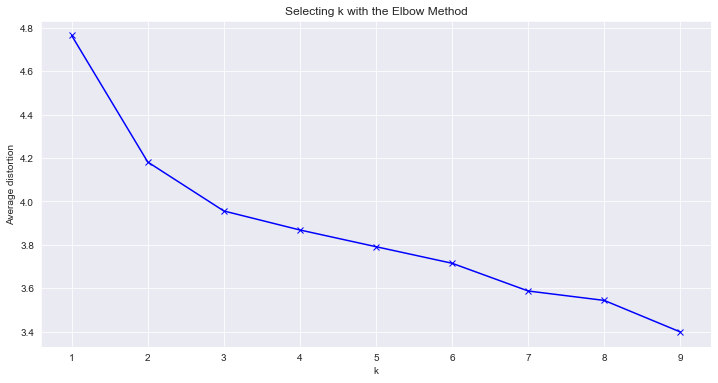

In [196]:
# We will use K-Means clustering to group data based on their attribute, but First, 
# we need to determine the optimal number of groups

from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model= KMeans(n_clusters=k)
    model.fit(datascaled)
    prediction=model.predict(datascaled)
    meanDistortions.append(sum(np.min(cdist(datascaled, model.cluster_centers_, 'euclidean'), axis=1)) / datascaled.shape[0])

plt.figure(figsize= (12,6))
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method');

Based on the **'elbow' method**, it is noticed that  the Avarage distortion index starts changing its rate of reduction when the number of clusters is **3**, suggesting this as a suitable number of clusters for this case.

In [197]:
# Checking silhouette_score of K-means clustering for a range of values of K
from sklearn.metrics import silhouette_score

for j in range(2,10):
    model= KMeans(n_clusters=j)
    model.fit(datascaled)
    model_silhouette_score=silhouette_score(datascaled,model.labels_).round(3)
    print (' For K=',j, 'Silhouette Score ---->',model_silhouette_score)

 For K= 2 Silhouette Score ----> 0.204
 For K= 3 Silhouette Score ----> 0.145
 For K= 4 Silhouette Score ----> 0.149
 For K= 5 Silhouette Score ----> 0.156
 For K= 6 Silhouette Score ----> 0.118
 For K= 7 Silhouette Score ----> 0.107
 For K= 8 Silhouette Score ----> 0.136
 For K= 9 Silhouette Score ----> 0.134


Based on the **Average Silhouette Coefficient**, once again **3 clusters** seem to be the most suitable approach.

In [198]:
kmeans = KMeans(n_clusters=3,n_init =15,random_state=42)
kmeans.fit(datascaled)

KMeans(n_clusters=3, n_init=15, random_state=42)

In [199]:
centroids = kmeans.cluster_centers_
display(centroids)

array([[-0.48052578, -0.33452056,  0.26164616,  0.14761528,  0.03806413,
         0.38699604,  0.06413685,  0.27433111,  0.3033758 ,  0.28199363,
         0.24975872,  0.38012342,  0.34903657,  0.27393026, -0.34295645,
        -0.45558191, -0.36847032,  0.063349  , -0.07753551,  0.09784972,
        -0.02282034, -0.04251415,  0.01323375,  0.12579316,  0.19599227,
        -0.09504193, -0.10742017, -0.13672436],
       [ 0.96455263,  0.62169082, -0.86774935, -0.70928102, -0.7079165 ,
        -0.02744308,  0.22376937, -0.4895447 , -0.76847074, -0.45479792,
        -0.50853125, -0.75724865, -0.76420074, -0.74419383,  0.6261111 ,
         0.0841138 ,  0.44741667, -0.47983552, -0.09402383, -0.07117541,
        -0.14463089,  0.07745413,  0.0578831 , -0.60129979, -0.09121919,
         0.13831827, -0.20892184, -0.00982271],
       [-1.28529548, -0.7608538 ,  1.62118628,  1.505597  ,  1.80035933,
        -0.98041816, -0.77658008,  0.56939066,  1.24048377,  0.45506005,
         0.68739651,  1.0012

In [205]:
# Creating a new dataframe only for labels and converting it into categorical variable
data_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
#data_labels.index = data_labels.index+1
data_labels['labels'] = data_labels['labels'].astype('category')
display (data_labels)

,labels
0,1
1,0
2,1
3,1
4,1
...,...
181,1
182,1
183,1
184,1


In [206]:
# Joining the label dataframe with the original dataframe (appending the prediction)
data_labeled = data.join(data_labels)
datascaled_labeled = datascaled.join(data_labels)
print("Groups Assigned : \n")
display (data_labeled)

Groups Assigned : 



,Country Name,Region,World Rank,Region Rank,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),labels
0,Afghanistan,Asia-Pacific,152.0,39.0,19.6,29.6,25.2,91.70,80.3,99.3,...,35.5,69.6,2.5,2.9,1958.0,8.8,5.0,53.9,7.3,1
1,Albania,Europe,52.0,27.0,54.8,30.6,40.4,86.30,73.9,80.6,...,2.9,36.0,3.9,2.5,12507.0,13.9,2.0,1119.1,71.2,0
2,Algeria,Middle East and North Africa,171.0,14.0,31.6,36.2,28.9,76.40,48.7,18.7,...,41.5,632.9,2.0,3.1,15237.0,10.0,5.6,1203.0,25.8,1
3,Angola,Sub-Saharan Africa,156.0,33.0,35.9,26.6,20.5,83.90,80.7,58.2,...,28.2,190.3,0.7,2.9,6753.0,8.2,31.7,-2254.5,65.3,1
4,Argentina,Americas,148.0,26.0,47.8,44.5,33.5,69.30,49.5,33.0,...,44.1,920.2,2.9,0.7,20876.0,8.7,25.7,11857.0,52.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Venezuela,Americas,179.0,32.0,7.6,13.1,7.9,74.70,58.1,17.6,...,31.4,380.7,-14.0,-7.8,12114.0,7.7,1087.5,-68.0,34.9,1
182,Vietnam,Asia-Pacific,128.0,30.0,49.8,40.3,34.0,79.70,74.1,40.7,...,93.6,647.4,6.8,6.2,6913.0,2.1,3.5,14100.0,58.2,1
183,Yemen,Middle East and North Africa,153.0,33.8,19.6,22.2,20.3,74.02,83.7,0.0,...,30.0,38.6,-13.8,-16.1,1287.0,14.0,4.9,-269.9,141.0,1
184,Zambia,Sub-Saharan Africa,138.0,27.0,45.0,35.6,32.3,72.30,80.1,12.3,...,17.2,68.9,3.6,4.0,3996.0,7.8,6.6,1091.2,62.2,1


### ANALYZING THE DISTRIBUTION OF THE DATA AMONG THE CLUSTERS (K = 3)

0    79
1    78
2    29
Name: labels, dtype: int64


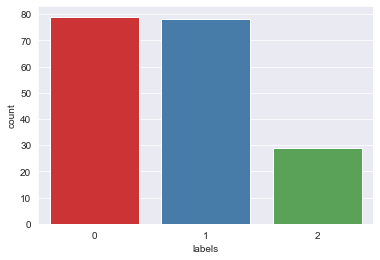

In [207]:
sns.countplot(data_labeled['labels'],palette='Set1');
print(data_labeled['labels'].value_counts())

In [208]:
data_clust = data_labeled.drop(['Country Name','Region'],axis=1).groupby(['labels'])
data_clust.mean().round()

,World Rank,Region Rank,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
labels,,,,,,,,,,,,,,,,,,,,,
0,66.0,16.0,57.0,48.0,42.0,82.0,66.0,75.0,68.0,63.0,...,33.0,516.0,631.0,3.0,3.0,24264.0,9.0,3.0,5040.0,52.0
1,141.0,29.0,35.0,32.0,28.0,77.0,69.0,51.0,51.0,53.0,...,32.0,46.0,339.0,4.0,3.0,6987.0,7.0,22.0,2443.0,56.0
2,24.0,11.0,84.0,72.0,77.0,65.0,46.0,84.0,83.0,66.0,...,41.0,35.0,1767.0,3.0,2.0,51562.0,6.0,2.0,29656.0,70.0


In [217]:
data_clust.count()['World Rank']

labels
0    79
1    78
2    29
Name: World Rank, dtype: int64

<b>Insights</b>: 

 - the countries divided in 3 clusters
 - Cluster 1:
    - there are 79 countries in cluster 1; they are not very poor but not rich either. 
    - GDP, business freedom  and labour freedom falls in between too
    - inflation is low in this  cluster, public debt is low as well.
    - Unemplyoment % is quiet high
 - Cluster 2:
    - there are 78 countries in cluster 1; these are the poorest of the countries
    - Property rights, Judical Effectiveness, Government Integrity, GDP per Capita, Labor and business Freedom are very low
    - inflation, Tax Burden are ver high 
    - 5 Year GDP Growth Rate, Population, Gov't Spending, GDP Growth Rate and good
 - Cluster 3:
    - there are 29 countries in cluster 1; these ae the rich lot of countries.
    - Property rights, Judical Effectiveness, Government Integrity, FDI Inflow, GDP per Capita etc are high
    - Population, Gov't Spending, GDP Growth Rate, Unemployment , inflation etc are low
 

## HIERARCHICAL CLUSTERING

### EXECUTING HIERARCHICAL CLUSTERING WITH DIFFERENT LINKAGE METHODS

Linkage method: single


array([[ 23.        , 137.        ,   1.63734711,   2.        ],
       [134.        , 150.        ,   1.74282396,   2.        ],
       [  7.        ,  14.        ,   1.75403564,   2.        ],
       [ 51.        ,  66.        ,   1.82258801,   2.        ],
       [  6.        , 160.        ,   1.84694834,   2.        ],
       [124.        , 128.        ,   1.88042349,   2.        ],
       [ 73.        , 187.        ,   1.89072493,   3.        ],
       [ 44.        , 100.        ,   1.90233437,   2.        ],
       [ 94.        , 192.        ,   1.90489695,   4.        ],
       [167.        , 191.        ,   1.95136587,   3.        ],
       [123.        , 189.        ,   2.01823539,   3.        ],
       [ 67.        , 108.        ,   2.02311061,   2.        ],
       [ 16.        , 195.        ,   2.09332535,   4.        ],
       [140.        , 141.        ,   2.10787511,   2.        ],
       [133.        , 196.        ,   2.11619516,   4.        ],
       [186.        , 193

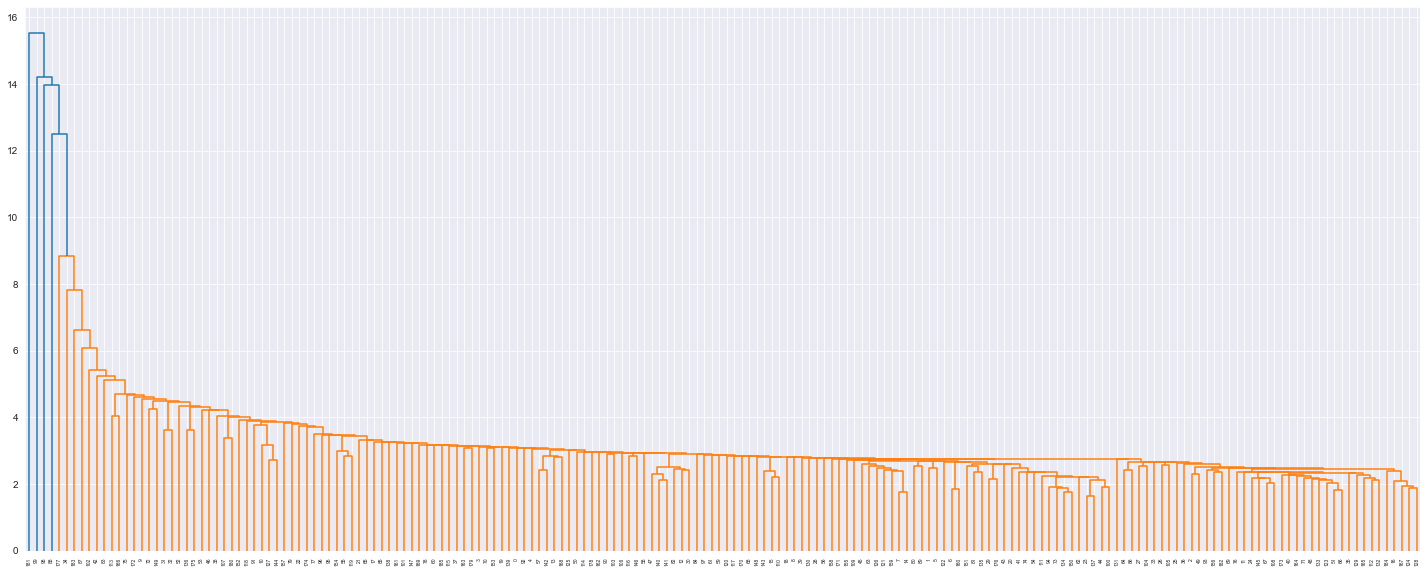

Linkage method: complete


array([[ 23.        , 137.        ,   1.63734711,   2.        ],
       [134.        , 150.        ,   1.74282396,   2.        ],
       [  7.        ,  14.        ,   1.75403564,   2.        ],
       [ 51.        ,  66.        ,   1.82258801,   2.        ],
       [  6.        , 160.        ,   1.84694834,   2.        ],
       [124.        , 128.        ,   1.88042349,   2.        ],
       [ 44.        , 100.        ,   1.90233437,   2.        ],
       [ 67.        , 108.        ,   2.02311061,   2.        ],
       [ 73.        , 187.        ,   2.10370381,   3.        ],
       [140.        , 141.        ,   2.10787511,   2.        ],
       [112.        , 132.        ,   2.12840399,   2.        ],
       [ 48.        , 123.        ,   2.14246681,   2.        ],
       [ 29.        , 176.        ,   2.14464116,   2.        ],
       [ 24.        , 145.        ,   2.20814749,   2.        ],
       [ 15.        , 110.        ,   2.21521626,   2.        ],
       [133.        , 164

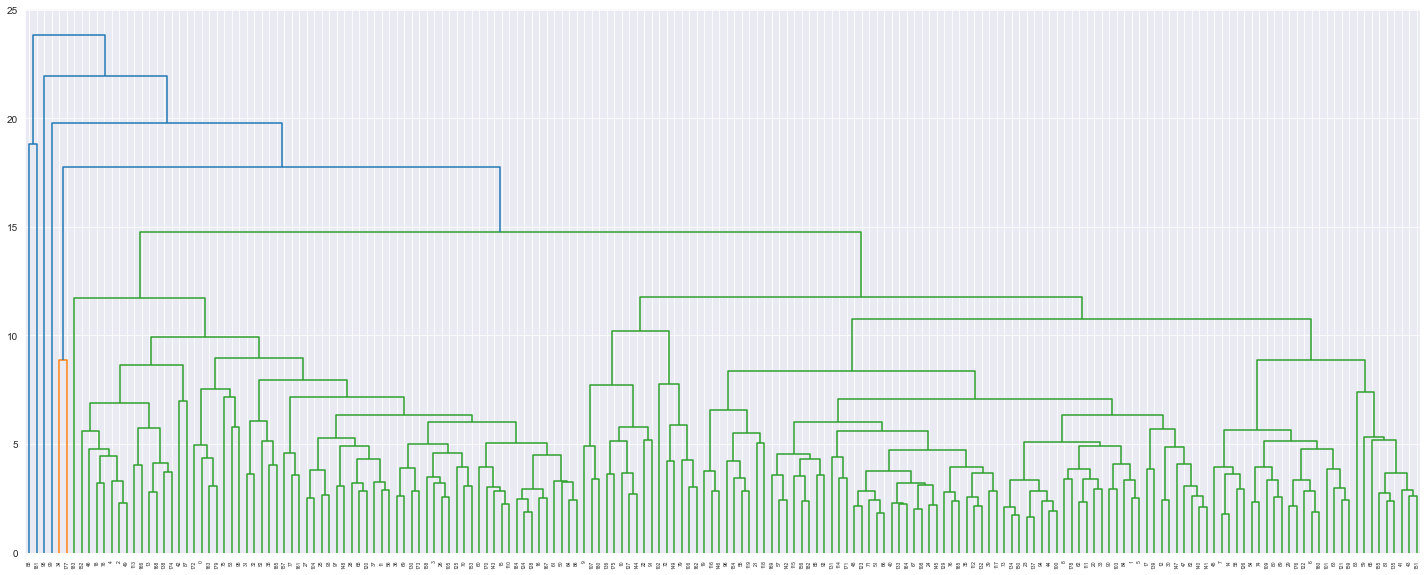

Linkage method: average


array([[ 23.        , 137.        ,   1.63734711,   2.        ],
       [134.        , 150.        ,   1.74282396,   2.        ],
       [  7.        ,  14.        ,   1.75403564,   2.        ],
       [ 51.        ,  66.        ,   1.82258801,   2.        ],
       [  6.        , 160.        ,   1.84694834,   2.        ],
       [124.        , 128.        ,   1.88042349,   2.        ],
       [ 44.        , 100.        ,   1.90233437,   2.        ],
       [ 73.        , 187.        ,   1.99721437,   3.        ],
       [ 67.        , 108.        ,   2.02311061,   2.        ],
       [140.        , 141.        ,   2.10787511,   2.        ],
       [112.        , 132.        ,   2.12840399,   2.        ],
       [123.        , 189.        ,   2.13869108,   3.        ],
       [ 29.        , 176.        ,   2.14464116,   2.        ],
       [ 24.        , 145.        ,   2.20814749,   2.        ],
       [ 15.        , 110.        ,   2.21521626,   2.        ],
       [133.        , 164

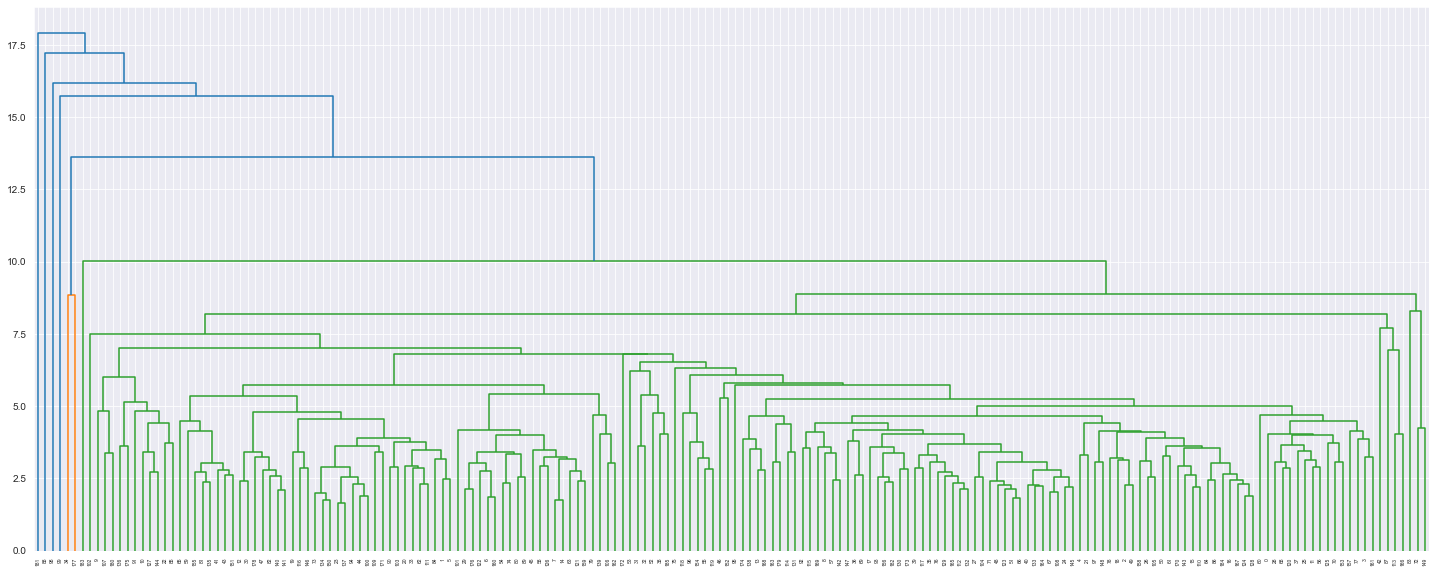

Linkage method: ward


array([[ 23.        , 137.        ,   1.63734711,   2.        ],
       [134.        , 150.        ,   1.74282396,   2.        ],
       [  7.        ,  14.        ,   1.75403564,   2.        ],
       [ 51.        ,  66.        ,   1.82258801,   2.        ],
       [  6.        , 160.        ,   1.84694834,   2.        ],
       [124.        , 128.        ,   1.88042349,   2.        ],
       [ 44.        , 100.        ,   1.90233437,   2.        ],
       [ 67.        , 108.        ,   2.02311061,   2.        ],
       [ 73.        , 187.        ,   2.07873243,   3.        ],
       [140.        , 141.        ,   2.10787511,   2.        ],
       [112.        , 132.        ,   2.12840399,   2.        ],
       [ 48.        , 123.        ,   2.14246681,   2.        ],
       [ 29.        , 176.        ,   2.14464116,   2.        ],
       [ 24.        , 145.        ,   2.20814749,   2.        ],
       [ 15.        , 110.        ,   2.21521626,   2.        ],
       [133.        , 164

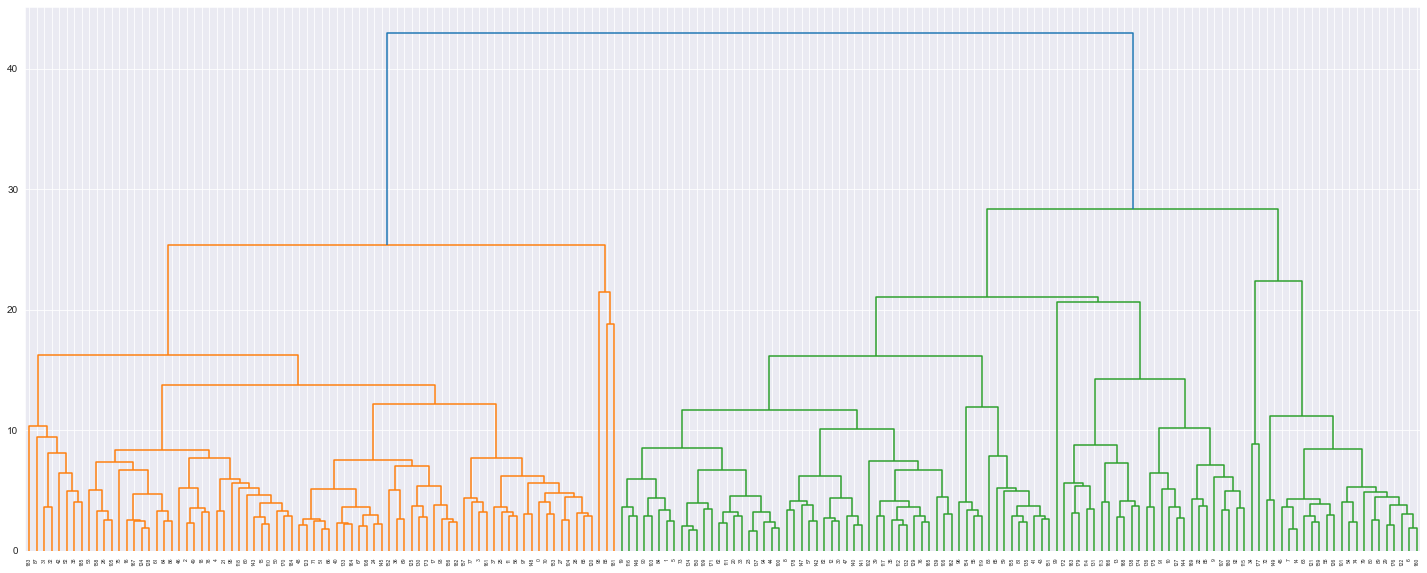

In [219]:
for i in ['single','complete','average','ward']:
    Z = linkage(datascaled,method=i, metric='euclidean')
    print ('Linkage method:',i)
    display(Z[:])
    plt.figure(figsize=(25, 10))
    dendrogram(Z)
    plt.show()  

In [220]:
# Comparison between hierarchical clustering using different likange methods based on cophenet index
from scipy.spatial.distance import pdist #Pairwise distribution between data points
df_columns = ['Linkage','cophenet index']
df_compare = pd.DataFrame(columns=df_columns)
row_index = 0
# Creating loop for metrics
for i in ['single','complete','average','weighted','centroid','ward']:
    Z = linkage(datascaled,method=i, metric='euclidean')
    c, coph_dists = cophenet(Z , pdist(datascaled))
    df_compare.loc[row_index,'Linkage'] = i
    df_compare.loc[row_index,'cophenet index'] = c
    row_index += 1
display(df_compare)

,Linkage,cophenet index
0,single,0.837895
1,complete,0.694508
2,average,0.883884
3,weighted,0.812499
4,centroid,0.892577
5,ward,0.342481


### ANALYSING HIERARCHICAL CLUSTERS FORMED USING DIFFERENT LINKAGE METHODS

#### SINGLE LINKAGE

In [234]:
Cluster1= AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')
Cluster1.fit(datascaled)

AgglomerativeClustering(linkage='single', n_clusters=3)

0    184
1      1
2      1
Name: Single_Linkage_labels, dtype: int64


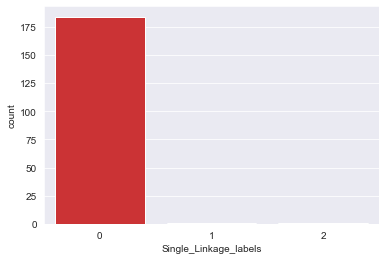

In [235]:
# Creating a new dataframe only for labels obtained from hierarquical clustering and converting it into categorical variable
labels1 = pd.DataFrame(Cluster1.labels_, columns = list(['Single_Linkage_labels']))
labels1['Single_Linkage_labels'] = labels1['Single_Linkage_labels'].astype('category')
# Joining the labels1 dataframe with the original dataframe (appending the prediction)
data_labeled1 = data.join(labels1)
datascaled_labeled1 = datascaled.join(labels1)
sns.countplot(data_labeled1['Single_Linkage_labels'],palette='Set1');
print(data_labeled1['Single_Linkage_labels'].value_counts())

#### COMPLETE LINKAGE

In [236]:
Cluster2= AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
Cluster2.fit(datascaled)

AgglomerativeClustering(linkage='complete', n_clusters=3)

0    183
1      2
2      1
Name: Complete_Linkage_labels, dtype: int64


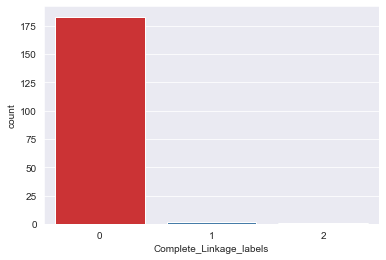

In [237]:
# Creating a new dataframe only for labels obtained from hierarquical clustering and converting it into categorical variable
labels2 = pd.DataFrame(Cluster2.labels_, columns = list(['Complete_Linkage_labels']))
labels2['Complete_Linkage_labels'] = labels2['Complete_Linkage_labels'].astype('category')
# Joining the labels2 dataframe with the original dataframe (appending the prediction)
data_labeled2 = data.join(labels2)
datascaled_labeled2 = datascaled.join(labels2)
sns.countplot(data_labeled2['Complete_Linkage_labels'],palette='Set1');
print(data_labeled2['Complete_Linkage_labels'].value_counts())

#### AVERAGE LINKAGE

In [238]:
Cluster3= AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')
Cluster3.fit(datascaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

0    184
1      1
2      1
Name: Average_Linkage_labels, dtype: int64


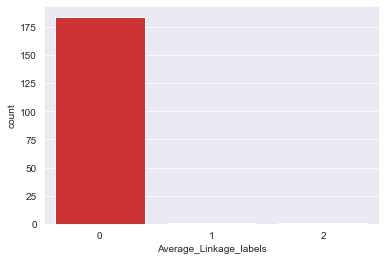

In [239]:
# Creating a new dataframe only for labels obtained from hierarquical clustering and converting it into categorical variable
labels3 = pd.DataFrame(Cluster3.labels_, columns = list(['Average_Linkage_labels']))
labels3['Average_Linkage_labels'] = labels3['Average_Linkage_labels'].astype('category')
# Joining the labels3 dataframe with the original dataframe (appending the prediction)
data_labeled3 = data.join(labels3)
datascaled_labeled3 = datascaled.join(labels3)
sns.countplot(data_labeled3['Average_Linkage_labels'],palette='Set1');
print(data_labeled3['Average_Linkage_labels'].value_counts())

#### WARD LINKAGE

In [240]:
Cluster4= AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
Cluster4.fit(datascaled)

AgglomerativeClustering(n_clusters=3)

2    84
0    79
1    23
Name: Ward_Linkage_labels, dtype: int64


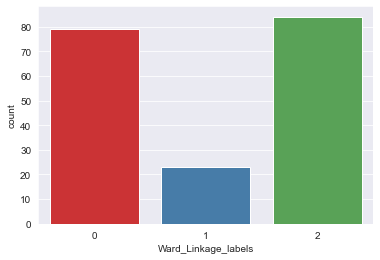

In [241]:
# Creating a new dataframe only for labels obtained from hierarquical clustering and converting it into categorical variable
labels4 = pd.DataFrame(Cluster4.labels_, columns = list(['Ward_Linkage_labels']))
labels4['Ward_Linkage_labels'] = labels4['Ward_Linkage_labels'].astype('category')
# Joining the labels4 dataframe with the original dataframe (appending the prediction)
data_labeled4 = data.join(labels4)
datascaled_labeled4 = datascaled.join(labels4)
sns.countplot(data_labeled4['Ward_Linkage_labels'],palette='Set1');
print(data_labeled4['Ward_Linkage_labels'].value_counts())

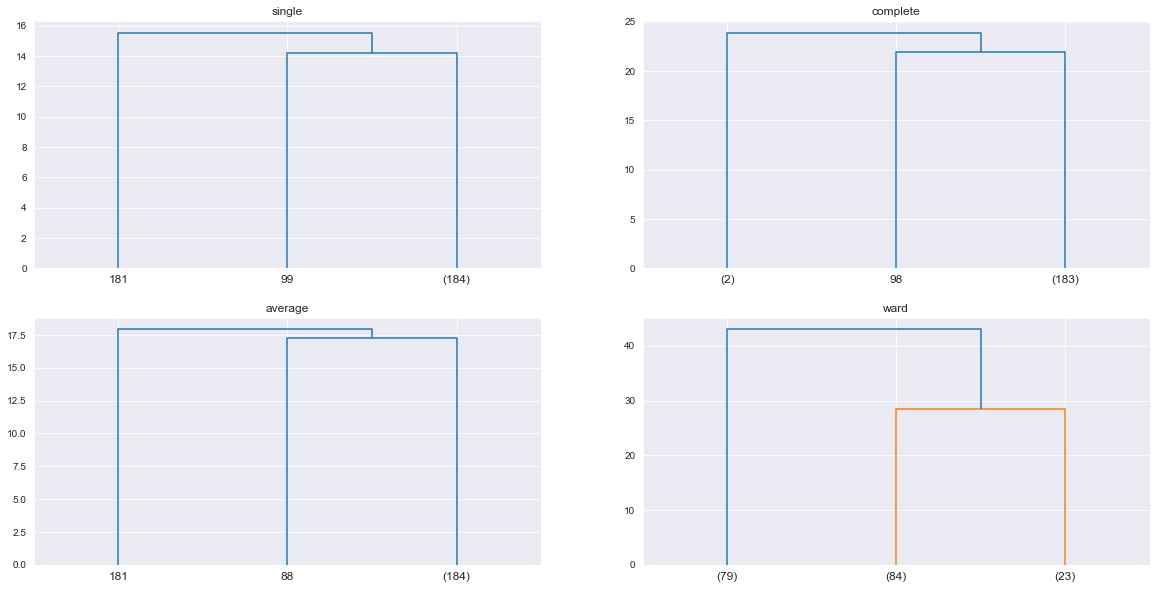

In [242]:
# Visualizing hierarchical clusters formed using truncate_mode ='lastp' attribute in dendrograms (p=3)
plt.figure(figsize= (20,10))
pos = 1 # index each of the plots and plot over the grid one by one
for i in ['single','complete','average','ward']:
    Z = linkage(datascaled,method=i, metric='euclidean')
    plt.subplot(2,2, pos)
    plt.title(i)
    dendrogram(Z,truncate_mode='lastp',p=3)  
    pos+= 1

#### Insights
 The hierachial clustering using 'WARD LINKAGE' produces result very close to K means.
 Whereas average single and complete linkage are giving completely diffrent result

## AVERAGE SILHOUETTE SCORE FOR BOTH K-MEANS & HIERARCHICAL CLUSTERING MODELS

In [243]:
# K-MEANS CLUSTERING MODEL
Kmeans_silh_score=silhouette_score(datascaled,kmeans.labels_).round(3)

# HIERARCHICAL CLUSTERING MODEL USING SINGLE LINKAGE
Single_silh_score=silhouette_score(datascaled,Cluster1.labels_).round(3)

# HIERARCHICAL CLOSTERING MODEL USING COMPLETE LINKAGE
Complete_silh_score=silhouette_score(datascaled,Cluster2.labels_).round(3)

# HIERARCHICAL CLOSTERING MODEL USING AVERAGE LINKAGE
Average_silh_score=silhouette_score(datascaled,Cluster3.labels_).round(3)

# HIERARCHICAL CLOSTERING MODEL USING WARD LINKAGE
Ward_silh_score=silhouette_score(datascaled,Cluster4.labels_).round(3)

print ('K-MEANS CLUSTERING MODEL SILHOUETTE SCORE-------------------------->',Kmeans_silh_score)
print ('')
print ('HIERARCHICAL CLUSTERING MODEL-SINGLE LINKAGE SILHOUETTE SCORE------>',Single_silh_score)
print ('HIERARCHICAL CLUSTERING MODEL-COMPLETE LINKAGE SILHOUETTE SCORE---->',Complete_silh_score)
print ('HIERARCHICAL CLUSTERING MODEL-AVERAGE LINKAGE SILHOUETTE SCORE----->',Average_silh_score)
print ('HIERARCHICAL CLUSTERING MODEL-WARD LINKAGE SILHOUETTE SCORE-------->',Ward_silh_score)

K-MEANS CLUSTERING MODEL SILHOUETTE SCORE--------------------------> 0.147

HIERARCHICAL CLUSTERING MODEL-SINGLE LINKAGE SILHOUETTE SCORE------> 0.572
HIERARCHICAL CLUSTERING MODEL-COMPLETE LINKAGE SILHOUETTE SCORE----> 0.585
HIERARCHICAL CLUSTERING MODEL-AVERAGE LINKAGE SILHOUETTE SCORE-----> 0.605
HIERARCHICAL CLUSTERING MODEL-WARD LINKAGE SILHOUETTE SCORE--------> 0.143


#### Insights
 - Based on Silhouette score, the Hierarchical Clustering  and Complete clustering have given an acceptable positive Silhouette score, therefore we will be considering these  models.
 
 - The Avegare Clusering model, puts all countries but 2 in a single cluster. the rest 2 cluster have these countries each:
     - Venezuela -> Cluster 2
     - North Korea -> Cluster 3
     
 - The Complete Clusering model, puts all countries but 3 in a single cluster. the rest 2 cluster have these countries each:
     - Venezuela -> Cluster 2
     - North Korea -> Cluster 2    
     - Libya -> Cluster 3       

In [251]:
data.iloc[[181,88]]

,Country Name,Region,World Rank,Region Rank,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
181,Venezuela,Americas,179.0,32.0,7.6,13.1,7.9,74.7,58.1,17.6,...,37.4,31.4,380.7,-14.0,-7.8,12114.0,7.7,1087.50,-68.0,34.90
88,"Korea, North",Asia-Pacific,180.0,43.0,31.6,5.0,24.4,0.0,0.0,0.0,...,100.0,25.4,40.0,1.1,3.7,1700.0,4.8,3.68,63.4,80.68


In [255]:
data.iloc[[98,181,88]]

,Country Name,Region,World Rank,Region Rank,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
98,Libya,Middle East and North Africa,79.2,21.8,7.6,24.4,15.8,85.88,0.0,20.0,...,139.2,6.4,64.4,70.8,-7.9,9986.0,17.7,28.00,229.54,4.70
181,Venezuela,Americas,179.0,32.0,7.6,13.1,7.9,74.70,58.1,17.6,...,37.4,31.4,380.7,-14.0,-7.8,12114.0,7.7,1087.50,-68.00,34.90
88,"Korea, North",Asia-Pacific,180.0,43.0,31.6,5.0,24.4,0.00,0.0,0.0,...,100.0,25.4,40.0,1.1,3.7,1700.0,4.8,3.68,63.40,80.68


## PRINCIPAL COMPONENT ANALYSIS (PCA)

### Down to 2 dimensions

In [261]:
data2 = copy.copy(data)
data2.drop (['Country Name','Region'],axis=1, inplace = True)
datascaled2=data2.apply(zscore)

In [262]:
datascaled2.sample(5)

,World Rank,Region Rank,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
40,-0.252264,-1.241861,-0.586812,0.159930,-0.172125,0.015079,0.857436,0.256574,-0.157415,-0.487202,...,-0.704004,-0.078875,-0.245622,0.747422,1.938684,-0.731925,-0.869740,-0.122412,-0.278009,-0.295160
82,-1.005072,-1.241861,0.428347,0.237667,0.178340,0.222662,0.512569,0.437563,0.923796,0.994222,...,-0.363878,-0.086862,-0.275163,-0.427292,-0.755005,-0.509719,0.884794,-0.077088,-0.269673,1.411674
121,-1.506945,-1.241861,1.828037,1.653605,2.418271,-1.976180,-0.932380,0.859871,1.140039,0.060433,...,0.636879,-0.081717,0.096192,-0.064513,-0.409661,1.361861,-0.479843,-0.116117,1.960536,0.009526
156,0.461938,0.343276,-0.391984,-0.306497,-0.639412,0.584010,1.049513,-1.137361,0.739354,-0.044881,...,-0.919853,-0.080170,-0.171434,-0.064513,0.419167,-0.356195,-0.603901,-0.050648,-0.250645,0.681019
102,-1.101586,-0.924833,0.392458,0.837359,-0.421006,-0.015674,1.141187,1.072613,-0.221016,-0.662727,...,-1.044130,-0.087653,-0.256095,1.006551,-1.238488,3.802507,-0.976075,-0.117376,-0.226342,-1.667726


In [264]:
pca=PCA(n_components=2)

In [265]:
pca.fit(datascaled2)

PCA(n_components=2)

In [276]:
data_pca=pca.transform(datascaled2)

In [277]:
data_pca.shape, datascaled2.shape

((186, 2), (186, 28))

In [278]:
data_pca[:5]

array([[ 3.66133192, -2.30833643],
       [-1.07081994, -0.68239638],
       [ 2.23491127,  0.71073868],
       [ 3.34190209, -0.56966431],
       [ 1.2666063 ,  2.01570722]])

#### Insights
 - datascaled_pca has been reduced to 2 dimensions.    

## Kmeans on PCA data

In [279]:
kmeans2 = KMeans(n_clusters=3,n_init =15,random_state=42)
kmeans2.fit(data_pca)

KMeans(n_clusters=3, n_init=15, random_state=42)

In [272]:
kmeans2.labels_

array([1, 2, 1, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2, 0, 1, 1, 2, 1, 2, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1, 2, 0, 1, 0,
       2, 1, 1, 1, 1, 2, 0, 2, 0, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1,
       1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 1, 2, 1, 1, 0,
       1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0, 0, 1, 1, 1, 0, 2, 1, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2, 0, 1, 1,
       2, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2,
       0, 0, 2, 1, 2, 1, 1, 1, 1, 1])

In [280]:
kmeans_labels1 = pd.DataFrame(kmeans2.labels_ , columns = list(['Kmeans_pca_labels']))
kmeans_labels1['Kmeans_pca_labels'] = kmeans_labels1['Kmeans_pca_labels'].astype('category')
kmeans_labels1.head()

,Kmeans_pca_labels
0,1
1,2
2,1
3,1
4,1


In [285]:
data_pca_labeled1 = pd.DataFrame(data_pca).join(kmeans_labels1)

In [287]:
data_pca_labeled1.head()

,0,1,Kmeans_pca_labels
0,3.661332,-2.308336,1
1,-1.070820,-0.682396,2
2,2.234911,0.710739,1
3,3.341902,-0.569664,1
4,1.266606,2.015707,1


In [289]:
#Join the labels with original dataframe
data_pca_labeled = data2.join(kmeans_labels1)

In [290]:
data_pca_labeled.head()

,World Rank,Region Rank,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,...,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Kmeans_pca_labels
0,152.0,39.0,19.6,29.6,25.2,91.7,80.3,99.3,49.2,60.4,...,35.5,69.6,2.5,2.9,1958.0,8.8,5.0,53.9,7.3,1
1,52.0,27.0,54.8,30.6,40.4,86.3,73.9,80.6,69.3,52.7,...,2.9,36.0,3.9,2.5,12507.0,13.9,2.0,1119.1,71.2,2
2,171.0,14.0,31.6,36.2,28.9,76.4,48.7,18.7,61.6,49.9,...,41.5,632.9,2.0,3.1,15237.0,10.0,5.6,1203.0,25.8,1
3,156.0,33.0,35.9,26.6,20.5,83.9,80.7,58.2,55.7,58.8,...,28.2,190.3,0.7,2.9,6753.0,8.2,31.7,-2254.5,65.3,1
4,148.0,26.0,47.8,44.5,33.5,69.3,49.5,33.0,56.4,46.9,...,44.1,920.2,2.9,0.7,20876.0,8.7,25.7,11857.0,52.6,1


2    78
1    76
0    32
Name: Kmeans_pca_labels, dtype: int64


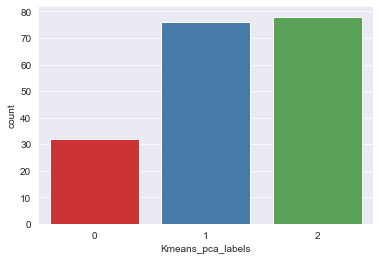

In [291]:
sns.countplot(data_pca_labeled['Kmeans_pca_labels'],palette='Set1');
print(data_pca_labeled['Kmeans_pca_labels'].value_counts())

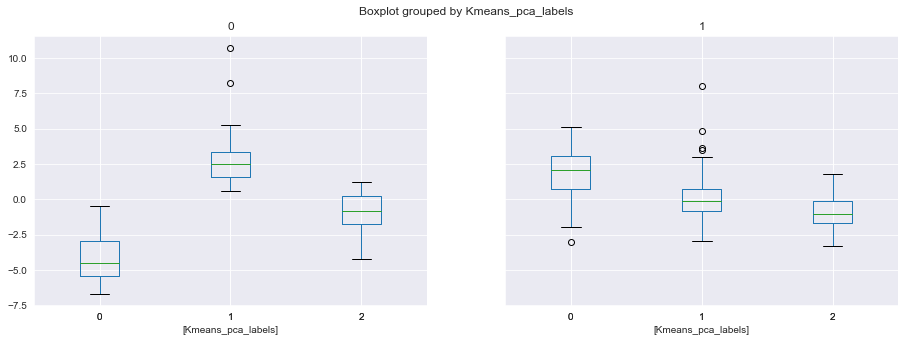

In [304]:
data_pca_labeled1.boxplot(by='Kmeans_pca_labels', layout = (1,2),figsize=(15,5))
plt.show()

In [312]:
Kmeans2_silh_score=silhouette_score(data_pca,kmeans2.labels_).round(3)
print ('K-MEANS CLUSTERING MODEL SILHOUETTE SCORE AFTER PCA ---->',Kmeans2_silh_score)

K-MEANS CLUSTERING MODEL SILHOUETTE SCORE AFTER PCA ----> 0.37


## Hierarchial Clustering using <u>Complete linkage</u> on PCA data

In [297]:
Hierarchical_Clusters = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
Hierarchical_Clusters.fit(data_pca)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [298]:
Hierarchical_Clusters.labels_

array([2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1,
       1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 1, 2, 1, 2, 1], dtype=int64)

In [299]:
Hierarchical_Clusters_labels = pd.DataFrame(Hierarchical_Clusters.labels_ , columns = list(['Kmeans_pca_labels']))
Hierarchical_Clusters_labels['Kmeans_pca_labels'] = Hierarchical_Clusters_labels['Kmeans_pca_labels'].astype('category')
Hierarchical_Clusters_labels.head()

,Kmeans_pca_labels
0,2
1,2
2,2
3,2
4,2


In [305]:
data_pca_labeled_hier = pd.DataFrame(data_pca).join(Hierarchical_Clusters_labels)
data_pca_labeled_hier.head()

,0,1,Kmeans_pca_labels
0,3.661332,-2.308336,2
1,-1.070820,-0.682396,2
2,2.234911,0.710739,2
3,3.341902,-0.569664,2
4,1.266606,2.015707,2


In [306]:
data_labeled_hier = data2.join(Hierarchical_Clusters_labels)
data_labeled_hier.head()

,World Rank,Region Rank,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,...,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Kmeans_pca_labels
0,152.0,39.0,19.6,29.6,25.2,91.7,80.3,99.3,49.2,60.4,...,35.5,69.6,2.5,2.9,1958.0,8.8,5.0,53.9,7.3,2
1,52.0,27.0,54.8,30.6,40.4,86.3,73.9,80.6,69.3,52.7,...,2.9,36.0,3.9,2.5,12507.0,13.9,2.0,1119.1,71.2,2
2,171.0,14.0,31.6,36.2,28.9,76.4,48.7,18.7,61.6,49.9,...,41.5,632.9,2.0,3.1,15237.0,10.0,5.6,1203.0,25.8,2
3,156.0,33.0,35.9,26.6,20.5,83.9,80.7,58.2,55.7,58.8,...,28.2,190.3,0.7,2.9,6753.0,8.2,31.7,-2254.5,65.3,2
4,148.0,26.0,47.8,44.5,33.5,69.3,49.5,33.0,56.4,46.9,...,44.1,920.2,2.9,0.7,20876.0,8.7,25.7,11857.0,52.6,2


2    139
0     37
1     10
Name: Kmeans_pca_labels, dtype: int64


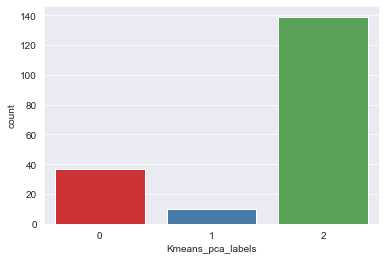

In [307]:
sns.countplot(data_labeled_hier['Kmeans_pca_labels'],palette='Set1');
print(data_labeled_hier['Kmeans_pca_labels'].value_counts())

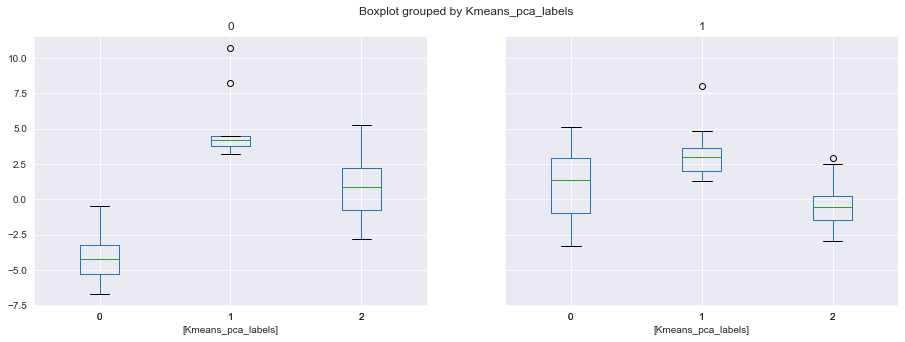

In [308]:
data_pca_labeled_hier.boxplot(by='Kmeans_pca_labels', layout = (1,2),figsize=(15,5))
plt.show()

In [309]:
Hierarchical_Clusters_silh_score=silhouette_score(data_pca,Hierarchical_Clusters.labels_).round(3)
print ('HIERARCHICAL CLUSTERING MODEL SILHOUETTE SCORE AFTER PCA ---->',Hierarchical_Clusters_silh_score)

HIERARCHICAL CLUSTERING MODEL SILHOUETTE SCORE AFTER PCA ----> 0.393


## PRINCIPAL COMPONENT ANALYSIS (PCA)

### Down to <u>3</u> dimensions

In [331]:
data3 = copy.copy(data)
data3.drop (['Country Name','Region'],axis=1, inplace = True)
datascaled3=data2.apply(zscore)
pca=PCA(n_components=3)
pca.fit(datascaled3)
data_pca3=pca.transform(datascaled3)
data_pca3[:5]

array([[ 3.66133192, -2.30833643,  0.57587875],
       [-1.07081994, -0.68239638,  1.07807041],
       [ 2.23491127,  0.71073868,  0.55816947],
       [ 3.34190209, -0.56966431, -0.01398677],
       [ 1.2666063 ,  2.01570722,  0.13248014]])

## Kmeans on new PCA data with 3 dimensions

In [332]:
kmeans3 = KMeans(n_clusters=3,n_init =15,random_state=42)
kmeans3.fit(data_pca)
kmeans_labels3 = pd.DataFrame(kmeans3.labels_ , columns = list(['Kmeans_pca_labels']))
kmeans_labels3['Kmeans_pca_labels'] = kmeans_labels3['Kmeans_pca_labels'].astype('category')
kmeans_labels3.head()

,Kmeans_pca_labels
0,1
1,2
2,1
3,1
4,1


In [333]:
data_pca_labeled3 = pd.DataFrame(data_pca3).join(kmeans_labels3)
print(data_pca_labeled3.head())
#Join the labels with original dataframe
data_labeled3 = data2.join(kmeans_labels3)
data_labeled3.head()

          0         1         2 Kmeans_pca_labels
0  3.661332 -2.308336  0.575879                 1
1 -1.070820 -0.682396  1.078070                 2
2  2.234911  0.710739  0.558169                 1
3  3.341902 -0.569664 -0.013987                 1
4  1.266606  2.015707  0.132480                 1


,World Rank,Region Rank,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,...,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Kmeans_pca_labels
0,152.0,39.0,19.6,29.6,25.2,91.7,80.3,99.3,49.2,60.4,...,35.5,69.6,2.5,2.9,1958.0,8.8,5.0,53.9,7.3,1
1,52.0,27.0,54.8,30.6,40.4,86.3,73.9,80.6,69.3,52.7,...,2.9,36.0,3.9,2.5,12507.0,13.9,2.0,1119.1,71.2,2
2,171.0,14.0,31.6,36.2,28.9,76.4,48.7,18.7,61.6,49.9,...,41.5,632.9,2.0,3.1,15237.0,10.0,5.6,1203.0,25.8,1
3,156.0,33.0,35.9,26.6,20.5,83.9,80.7,58.2,55.7,58.8,...,28.2,190.3,0.7,2.9,6753.0,8.2,31.7,-2254.5,65.3,1
4,148.0,26.0,47.8,44.5,33.5,69.3,49.5,33.0,56.4,46.9,...,44.1,920.2,2.9,0.7,20876.0,8.7,25.7,11857.0,52.6,1


2    78
1    76
0    32
Name: Kmeans_pca_labels, dtype: int64


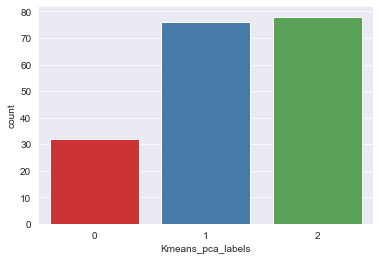

In [334]:
sns.countplot(data_pca_labeled3['Kmeans_pca_labels'],palette='Set1');
print(data_pca_labeled3['Kmeans_pca_labels'].value_counts())

In [335]:
Kmeans3_silh_score=silhouette_score(data_pca3,kmeans3.labels_).round(3)
print ('K-MEANS CLUSTERING MODEL SILHOUETTE SCORE AFTER PCA ---->',Kmeans3_silh_score)

K-MEANS CLUSTERING MODEL SILHOUETTE SCORE AFTER PCA ----> 0.292


## COMPARING K-MEANS CLUSTERS WITH HIERARCHICAL CLUSTERS

In [336]:
score_columns = ['Clustering Model','Silhouette score']
score_compare = pd.DataFrame(columns=score_columns)
row_index = 0

score_compare.loc[row_index,'Clustering Model'] = 'K-means Clusters'
score_compare.loc[row_index,'Silhouette score'] = Kmeans_silh_score
row_index += 1
score_compare.loc[row_index,'Clustering Model'] = 'Hierarchical Cluster - Single Linkage'
score_compare.loc[row_index,'Silhouette score'] = Single_silh_score
row_index += 1
score_compare.loc[row_index,'Clustering Model'] =  'Hierarchical Cluster - Complete Linkage'
score_compare.loc[row_index,'Silhouette score'] = Complete_silh_score
row_index += 1
score_compare.loc[row_index,'Clustering Model'] = 'Hierarchical Cluster - Average Linkage'
score_compare.loc[row_index,'Silhouette score'] = Average_silh_score
row_index += 1
score_compare.loc[row_index,'Clustering Model'] = 'Hierarchical Cluster - Ward Linkage'
score_compare.loc[row_index,'Silhouette score'] = Ward_silh_score
row_index += 1
score_compare.loc[row_index,'Clustering Model'] = 'K-means Clusters - after PCA (dimensions = 2)'
score_compare.loc[row_index,'Silhouette score'] = Kmeans2_silh_score 
row_index += 1
score_compare.loc[row_index,'Clustering Model'] = 'Hierar. Cluster - Complete Linkage - after PCA'
score_compare.loc[row_index,'Silhouette score'] = Hierarchical_Clusters_silh_score
row_index += 1
score_compare.loc[row_index,'Clustering Model'] = 'K-means Clusters - after PCA (dimensions = 3)'
score_compare.loc[row_index,'Silhouette score'] = Kmeans3_silh_score

display(score_compare)

,Clustering Model,Silhouette score
0,K-means Clusters,0.147
1,Hierarchical Cluster - Single Linkage,0.572
2,Hierarchical Cluster - Complete Linkage,0.585
3,Hierarchical Cluster - Average Linkage,0.605
4,Hierarchical Cluster - Ward Linkage,0.143
5,K-means Clusters - after PCA (dimensions = 2),0.37
6,Hierar. Cluster - Complete Linkage - after PCA,0.393
7,K-means Clusters - after PCA (dimensions = 3),0.292


#### Insights
 - Based on Silhouette score, the PCA performed lower than data with no PCA.
   -  however this is a one off case and does not entail that PCA has lower score in general
 - before appying PCA the complete linkage score was 0.585 and after PCA the score went down to 0.393

## PLOT CLUSTERS

### 1. Plotting K means cluster with PCA (2 dimensions)

In [395]:
def plot_cluster(dataf):
    df = dataf.copy()

    # get centroids
    centroids = kmeans2.cluster_centers_
    cen_x = [i[0] for i in centroids] 
    cen_y = [i[1] for i in centroids]
    #print(cen_x,cen_y )

    ## add to df
    df['cen_x'] = df.Kmeans_pca_labels.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
    df['cen_y'] = df.Kmeans_pca_labels.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

    # define and map colors
    colors = ['#DF2020', '#1a9e0e', '#2095DF']
    df['c'] = df.Kmeans_pca_labels.map({0:colors[0], 1:colors[1], 2:colors[2]})

    #####PLOT#####
    fig, ax = plt.subplots(1, figsize=(15, 8))

    # plot data
    plt.scatter(df[0], df[1], c=df.c, alpha = 0.6, s=20)

    # draw enclosure
    for i in df['Kmeans_pca_labels'].unique():
        points = df[df['Kmeans_pca_labels'] == i][[0,1]].values
        # get convex hull
        hull = ConvexHull(points)
        # get x and y coordinates
        # repeat last point to close the polygon
        x_hull = np.append(points[hull.vertices,0],
                           points[hull.vertices,0][0])
        y_hull = np.append(points[hull.vertices,1],
                           points[hull.vertices,1][0])
        # plot shape
        plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])

    # plot centroids
    plt.scatter(cen_x, cen_y, marker='^', c=colors, s=110)

    # create a list of legend elemntes
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
                   markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

    ## centroids
    cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i), 
                markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]

    # plot legend
    legend_elements.extend(cent_leg)

    # plot legend
    plt.legend(handles=legend_elements, loc='upper right', ncol=2, fontsize = 'large')

    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')

    plt.show()

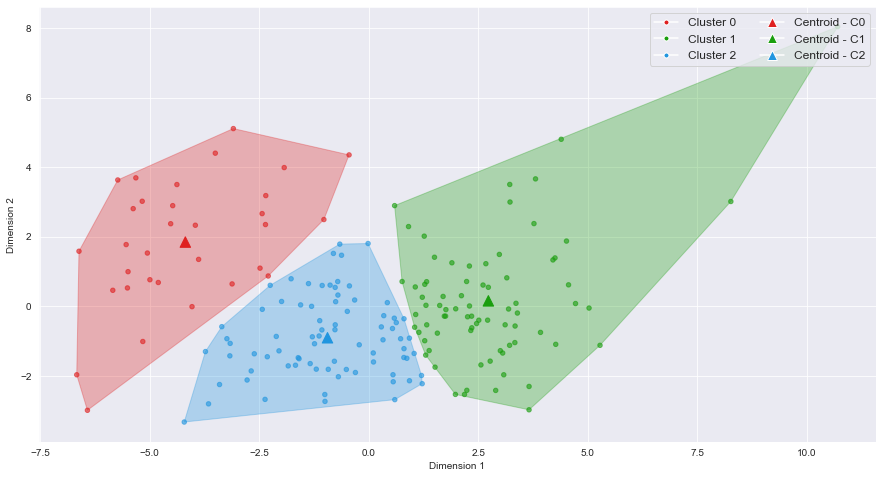

In [396]:
plot_cluster(data_pca_labeled1)

### 2. Plotting HIERARCHICAL CLUSTERING - Complete Linkage cluster with PCA (2 dimensions)

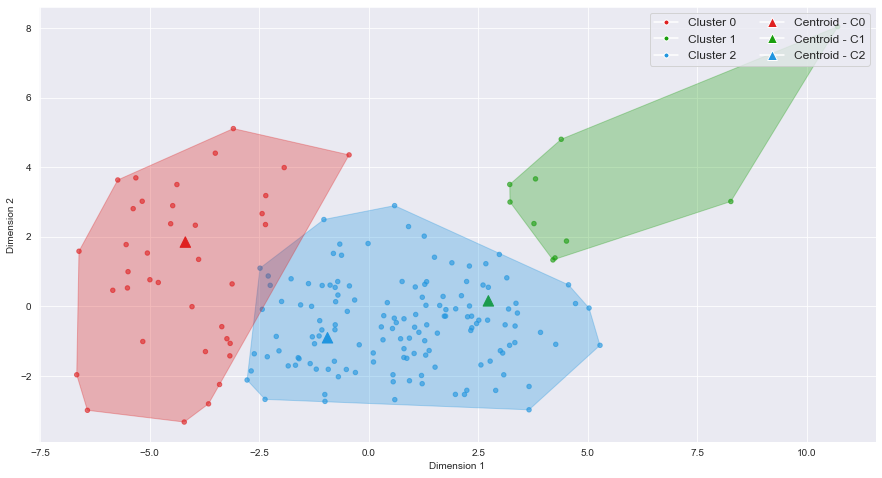

In [400]:
plot_cluster(data_pca_labeled_hier)

# Key Insights and analysis:

<ol>
  <li><b> The data can be segmented into 3 groups </b></li>
  <li><b> the first and smallest cluster contains the countries with highest GDP,  less tax burden, low inflation and more rights and previliges. </b></li>
  <li><b> This cluster also has lesser GDP growth rate and lesser fiscal spending. </b></li>
  <li><b> Since GDP per capita is high, so inflation is less and govt spending is also low. </b></li>  
  <li><b> The FDI Inflow is very high for these counries, hence the outlook is good </b></li>  
  <li><b> The second cluster is formed by poorest countries, they have less GDP, lesser rights, less spending </b></li>
  <li><b> This cluster has high growth rate, but also very high inflation which is a big hurdle </b></li>
  <li><b> Additionally the FDI inflow is very less, wihch is an obstruction in GDP growth rate </b></li>
  <li><b> The third and last cluster is forthe coutries that fall in between </b></li>
    <li><b> they have more rights and privges than the second cluster, but less than the first cluster. </b></li>
    <li><b> the tax burden for this cluster is very high and people pay excessive tax </b></li>
    <li><b> Population of this cluster is veru high whihc is impeding their growth </b></li>
    <li><b> Unemplyement rate is excessively high in these countries, which is a drawback </b></li>
    <li><b> FDI inflow is very less compared to first cluster, thish could be higher too, whcih will help in growth </b></li>
</ol>